In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
pip install matplotlib

In [54]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [55]:
import json
data_file_path ="C:\\Users\\DELL\\OneDrive\\Documents\\Vino_WIP\\Weather_Prediction\\data\\raw_data.json"

with open(data_file_path, "r") as json_file:
    json_content = json_file.read()

json_data = json.loads(json_content)



In [56]:
json_data

{'latitude': 22.0,
 'longitude': 79.0,
 'generationtime_ms': 193.36700439453125,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 696.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relativehumidity_2m': '%',
  'precipitation': 'mm',
  'weathercode': 'wmo code',
  'cloudcover': '%',
  'windspeed_10m': 'km/h',
  'winddirection_10m': '°'},
 'hourly': {'time': ['2022-01-01T00:00',
   '2022-01-01T01:00',
   '2022-01-01T02:00',
   '2022-01-01T03:00',
   '2022-01-01T04:00',
   '2022-01-01T05:00',
   '2022-01-01T06:00',
   '2022-01-01T07:00',
   '2022-01-01T08:00',
   '2022-01-01T09:00',
   '2022-01-01T10:00',
   '2022-01-01T11:00',
   '2022-01-01T12:00',
   '2022-01-01T13:00',
   '2022-01-01T14:00',
   '2022-01-01T15:00',
   '2022-01-01T16:00',
   '2022-01-01T17:00',
   '2022-01-01T18:00',
   '2022-01-01T19:00',
   '2022-01-01T20:00',
   '2022-01-01T21:00',
   '2022-01-01T22:00',
   '2022-01-01T23:00',
   '2022-01-02T00:00',
  

In [57]:
json_data=json.loads(json_content)
hourly_data=json_data['hourly']

In [58]:
df = pd.DataFrame(hourly_data)


In [59]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [60]:
df.columns


Index(['time', 'temperature_2m', 'relativehumidity_2m', 'precipitation',
       'weathercode', 'cloudcover', 'windspeed_10m', 'winddirection_10m'],
      dtype='object')

In [61]:
df.head()

,time,temperature_2m,relativehumidity_2m,precipitation,weathercode,cloudcover,windspeed_10m,winddirection_10m
0,2022-01-01T00:00,11.8,82.0,0.0,0.0,17.0,11.5,51.0
1,2022-01-01T01:00,11.6,83.0,0.0,0.0,13.0,11.5,49.0
2,2022-01-01T02:00,11.6,84.0,0.0,0.0,7.0,11.2,50.0
3,2022-01-01T03:00,14.2,76.0,0.0,0.0,2.0,10.7,45.0
4,2022-01-01T04:00,17.1,66.0,0.0,0.0,1.0,9.6,34.0


In [62]:
column_units_mapping={'temperature_2m': 'temperature_2m (°C)',
  'relativehumidity_2m': 'relativehumidity_2m (%)',
  'precipitation': 'precipitation (mm)',
  'weathercode': 'weathercode (wmo code)',
  'cloudcover': 'cloudcover (%)',
  'windspeed_10m': 'windspeed_10m (km/h)',
  'winddirection_10m': 'winddirection_10m (°)'}

In [63]:
df=df.rename(columns=column_units_mapping)

In [64]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
0,2022-01-01T00:00,11.8,82.0,0.0,0.0,17.0,11.5,51.0
1,2022-01-01T01:00,11.6,83.0,0.0,0.0,13.0,11.5,49.0
2,2022-01-01T02:00,11.6,84.0,0.0,0.0,7.0,11.2,50.0
3,2022-01-01T03:00,14.2,76.0,0.0,0.0,2.0,10.7,45.0
4,2022-01-01T04:00,17.1,66.0,0.0,0.0,1.0,9.6,34.0


In [65]:
df.shape

(13968, 8)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13968 entries, 0 to 13967
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     13968 non-null  object 
 1   temperature_2m (°C)      13944 non-null  float64
 2   relativehumidity_2m (%)  13944 non-null  float64
 3   precipitation (mm)       13944 non-null  float64
 4   weathercode (wmo code)   13944 non-null  float64
 5   cloudcover (%)           13944 non-null  float64
 6   windspeed_10m (km/h)     13944 non-null  float64
 7   winddirection_10m (°)    13944 non-null  float64
dtypes: float64(7), object(1)
memory usage: 873.1+ KB


In [67]:
df.describe()

,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
count,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000
mean,24.481562,56.115462,0.174534,10.952811,29.364386,9.094464,172.642714
std,6.169811,26.361733,0.657946,21.355656,33.719136,4.283210,103.123617
min,7.400000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.100000,33.000000,0.000000,0.000000,0.000000,6.200000,79.000000
50%,24.100000,55.000000,0.000000,0.000000,16.000000,8.400000,163.000000
75%,28.000000,80.000000,0.000000,2.000000,49.000000,11.300000,264.000000
max,40.700000,100.000000,10.300000,65.000000,100.000000,30.400000,360.000000


In [68]:
#checking for null values
df.isnull().sum()

time                        0
temperature_2m (°C)        24
relativehumidity_2m (%)    24
precipitation (mm)         24
weathercode (wmo code)     24
cloudcover (%)             24
windspeed_10m (km/h)       24
winddirection_10m (°)      24
dtype: int64

In [69]:
rows_with_nulls = df[df.isnull().any(axis=1)]

In [70]:
rows_with_nulls

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
13944,2023-08-05T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13945,2023-08-05T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13946,2023-08-05T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13947,2023-08-05T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13948,2023-08-05T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13949,2023-08-05T05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13950,2023-08-05T06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13951,2023-08-05T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13952,2023-08-05T08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13953,2023-08-05T09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# since we dont have the datas from 05-08-2023, so we are removing
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

time                       0
temperature_2m (°C)        0
relativehumidity_2m (%)    0
precipitation (mm)         0
weathercode (wmo code)     0
cloudcover (%)             0
windspeed_10m (km/h)       0
winddirection_10m (°)      0
dtype: int64

In [73]:
df.shape

(13944, 8)

In [74]:
#Check for the duplicates
df.duplicated().sum()

0

In [75]:
columns_to_check = df.columns.to_list()
     

In [76]:
columns_to_check.remove('time')

In [77]:
type(columns_to_check)

list

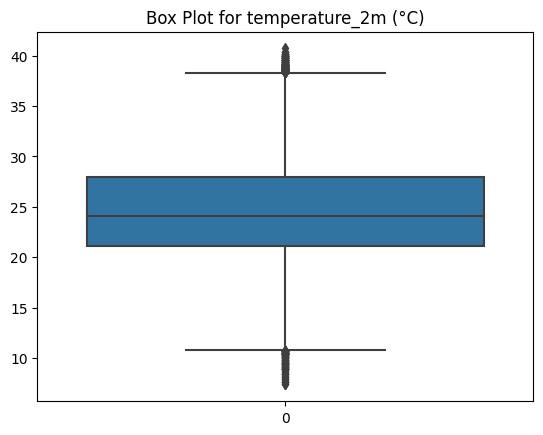

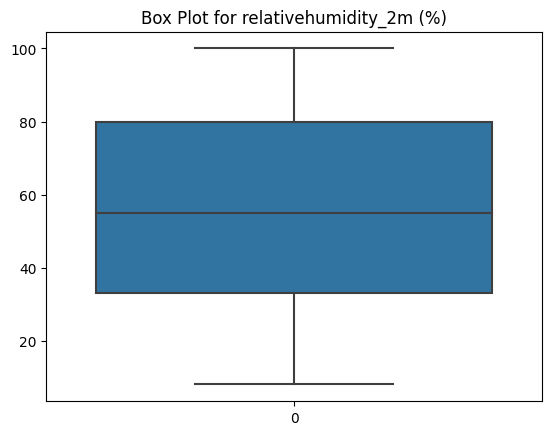

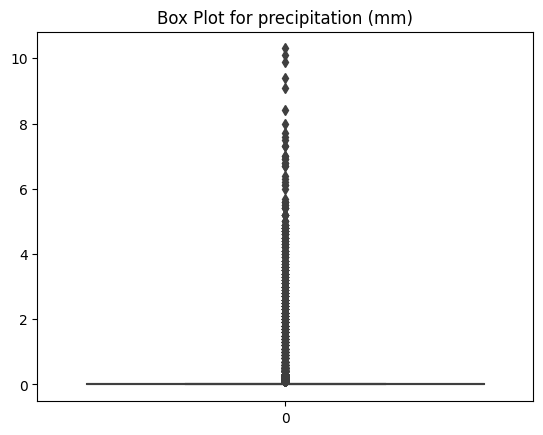

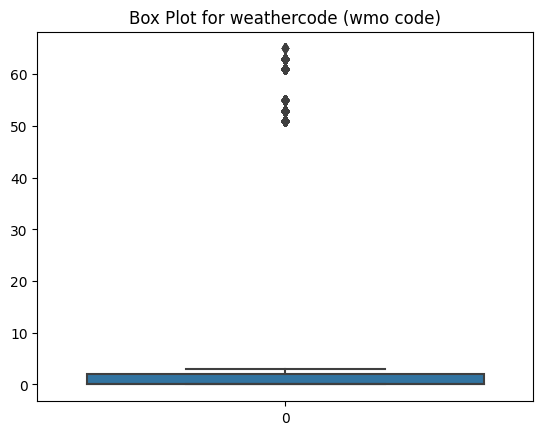

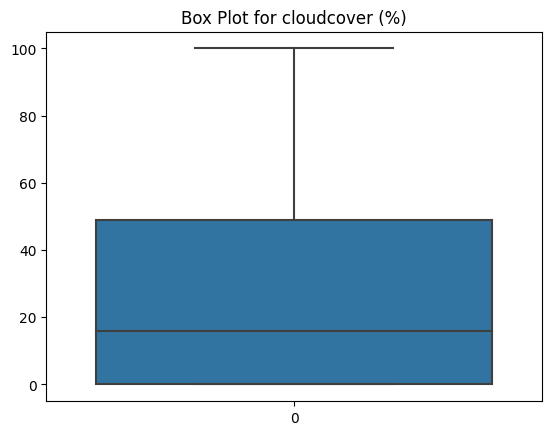

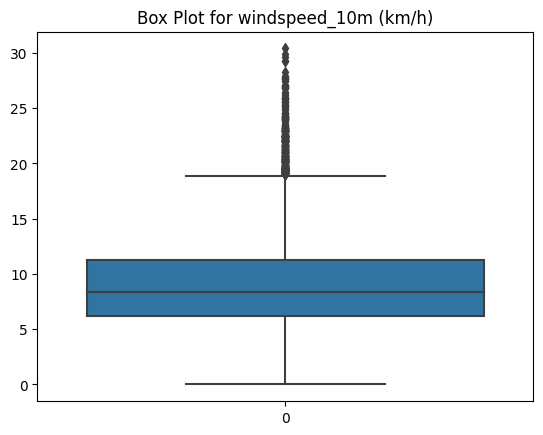

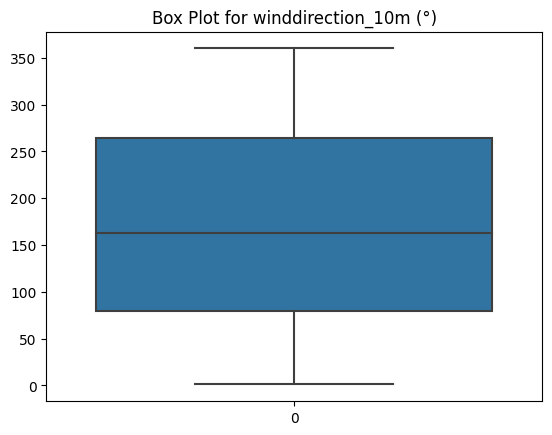

In [78]:
for column in columns_to_check:
    sns.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


In [79]:

# # Select only numeric columns for calculating IQR
# numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the IQR for each numeric column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Find potential outliers for each numeric column
potential_outliers = ((df[columns_to_check] < Q1 - threshold * IQR) | (df[columns_to_check] > Q3 + threshold * IQR))

# Count the number of outliers in each numeric column
outliers_count = potential_outliers.sum()

# Print the number of outliers in each numeric column
print(outliers_count)







temperature_2m (°C)         294
relativehumidity_2m (%)       0
precipitation (mm)         2730
weathercode (wmo code)     2730
cloudcover (%)                0
windspeed_10m (km/h)        407
winddirection_10m (°)         0
dtype: int64


In [80]:
df[potential_outliers['temperature_2m (°C)']].head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
288,2022-01-13T00:00,10.7,78.0,0.0,0.0,9.0,11.5,51.0
289,2022-01-13T01:00,10.5,79.0,0.0,0.0,13.0,11.5,49.0
290,2022-01-13T02:00,10.5,81.0,0.0,0.0,12.0,11.2,50.0
361,2022-01-16T01:00,10.7,96.0,0.0,2.0,63.0,9.2,51.0
362,2022-01-16T02:00,10.7,96.0,0.0,2.0,77.0,8.9,47.0


In [81]:
# precipitation and weather code have more outliers

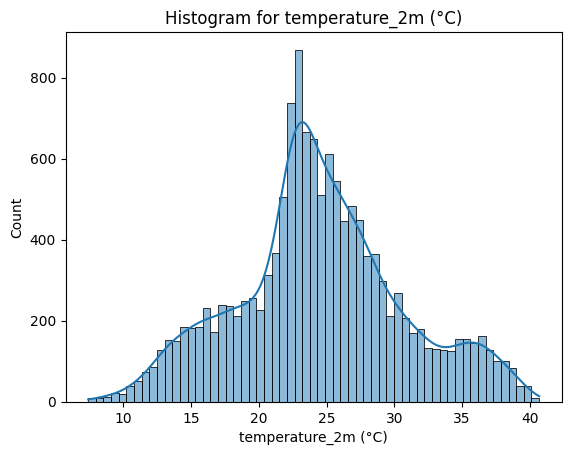

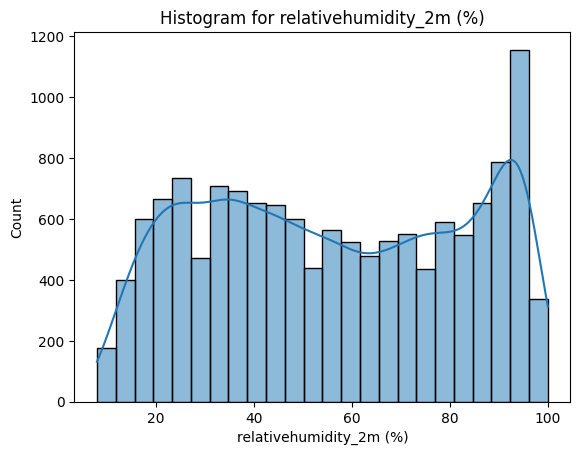

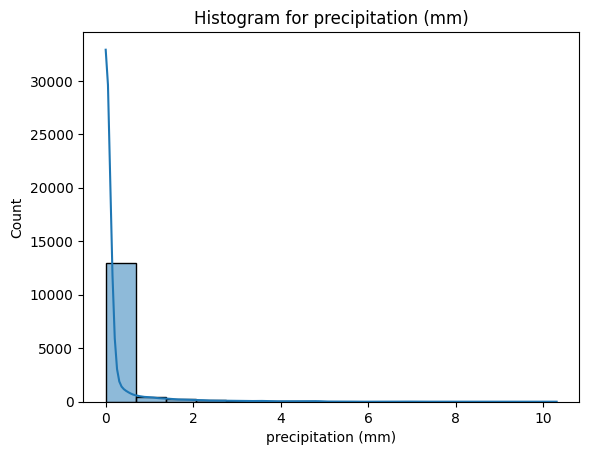

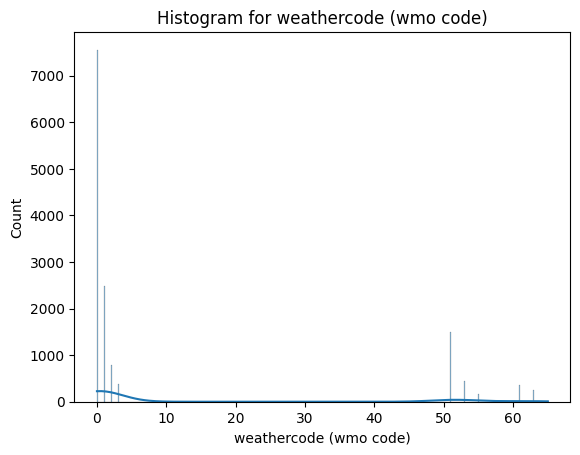

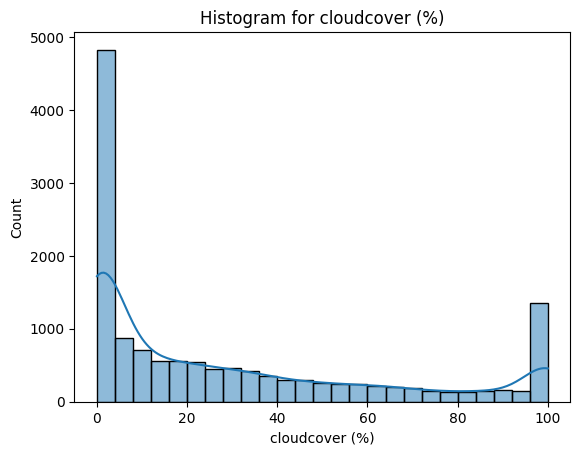

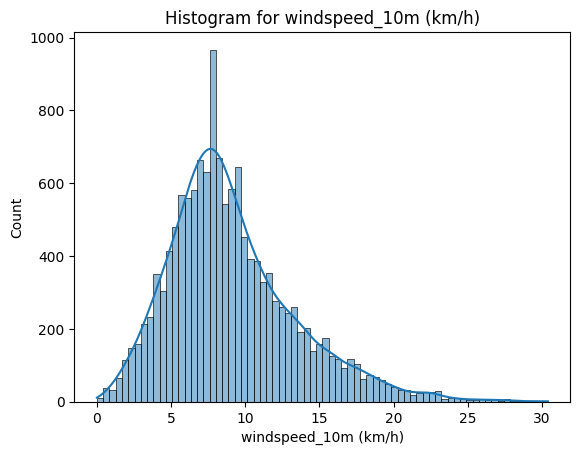

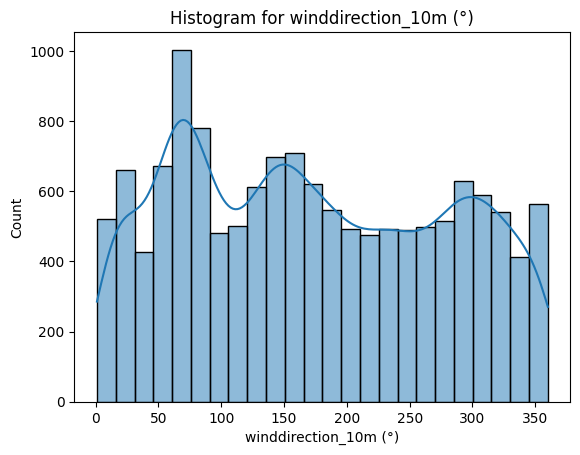

In [82]:
#Univariate analysis
for column in columns_to_check:
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

In [83]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
0,2022-01-01T00:00,11.8,82.0,0.0,0.0,17.0,11.5,51.0
1,2022-01-01T01:00,11.6,83.0,0.0,0.0,13.0,11.5,49.0
2,2022-01-01T02:00,11.6,84.0,0.0,0.0,7.0,11.2,50.0
3,2022-01-01T03:00,14.2,76.0,0.0,0.0,2.0,10.7,45.0
4,2022-01-01T04:00,17.1,66.0,0.0,0.0,1.0,9.6,34.0


In [84]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
0,2022-01-01T00:00,11.8,82.0,0.0,0.0,17.0,11.5,51.0
1,2022-01-01T01:00,11.6,83.0,0.0,0.0,13.0,11.5,49.0
2,2022-01-01T02:00,11.6,84.0,0.0,0.0,7.0,11.2,50.0
3,2022-01-01T03:00,14.2,76.0,0.0,0.0,2.0,10.7,45.0
4,2022-01-01T04:00,17.1,66.0,0.0,0.0,1.0,9.6,34.0


In [85]:
df.dtypes

time                        object
temperature_2m (°C)        float64
relativehumidity_2m (%)    float64
precipitation (mm)         float64
weathercode (wmo code)     float64
cloudcover (%)             float64
windspeed_10m (km/h)       float64
winddirection_10m (°)      float64
dtype: object

In [86]:
from datetime import datetime as dt

In [87]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M')

In [88]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
0,2022-01-01 00:00:00,11.8,82.0,0.0,0.0,17.0,11.5,51.0
1,2022-01-01 01:00:00,11.6,83.0,0.0,0.0,13.0,11.5,49.0
2,2022-01-01 02:00:00,11.6,84.0,0.0,0.0,7.0,11.2,50.0
3,2022-01-01 03:00:00,14.2,76.0,0.0,0.0,2.0,10.7,45.0
4,2022-01-01 04:00:00,17.1,66.0,0.0,0.0,1.0,9.6,34.0


In [89]:
df['Month']=df['time'].dt.month

In [90]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),Month
0,2022-01-01 00:00:00,11.8,82.0,0.0,0.0,17.0,11.5,51.0,1
1,2022-01-01 01:00:00,11.6,83.0,0.0,0.0,13.0,11.5,49.0,1
2,2022-01-01 02:00:00,11.6,84.0,0.0,0.0,7.0,11.2,50.0,1
3,2022-01-01 03:00:00,14.2,76.0,0.0,0.0,2.0,10.7,45.0,1
4,2022-01-01 04:00:00,17.1,66.0,0.0,0.0,1.0,9.6,34.0,1


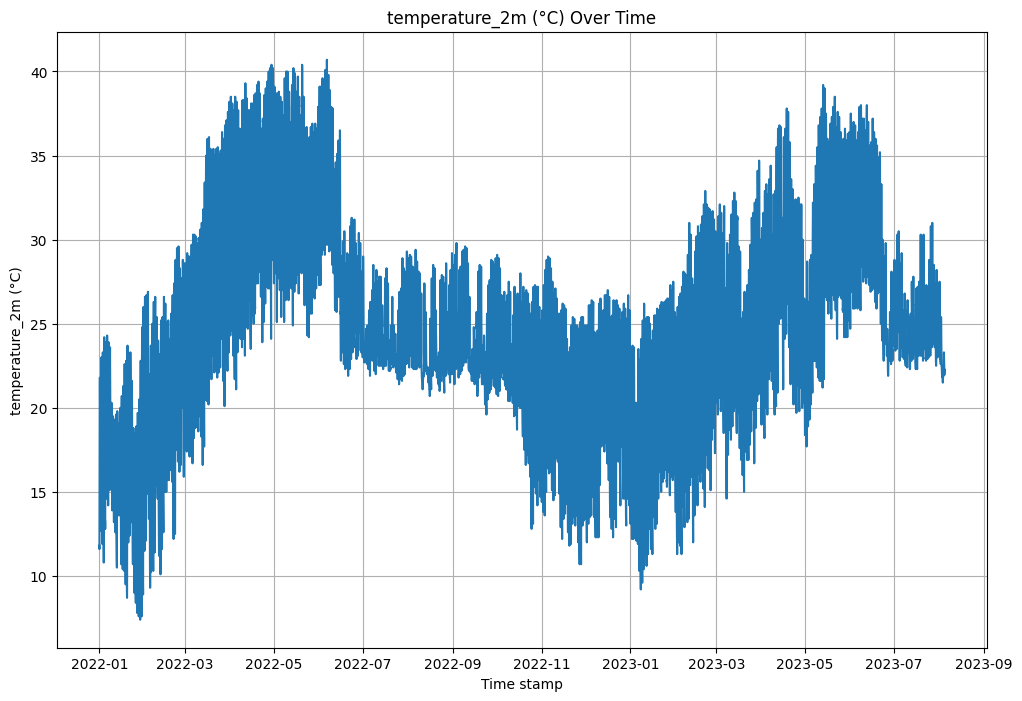

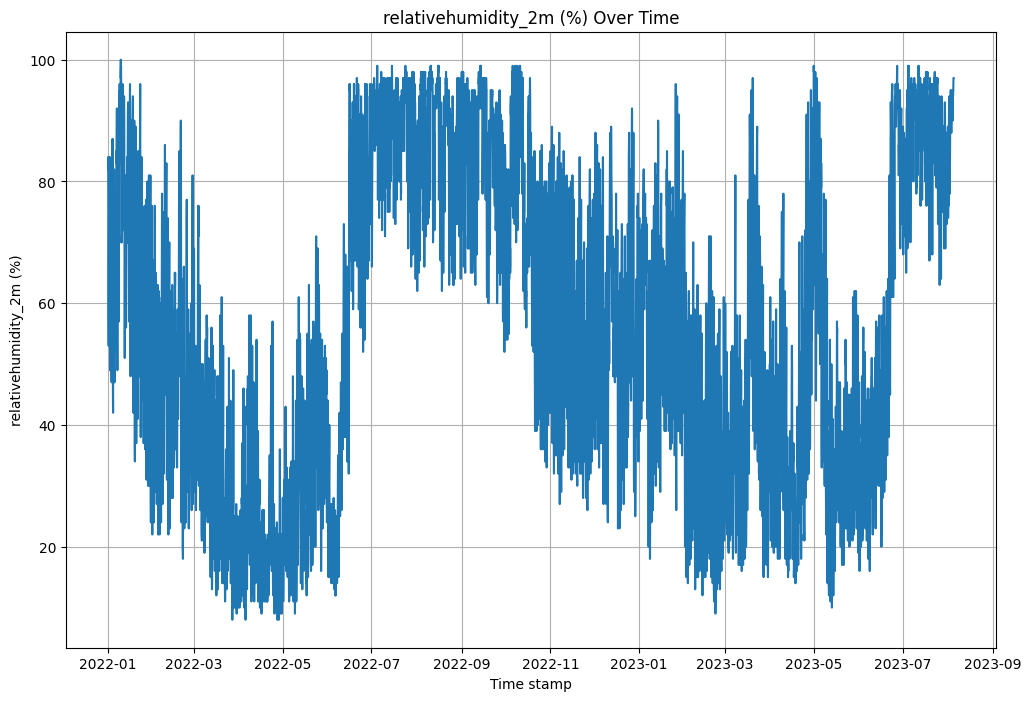

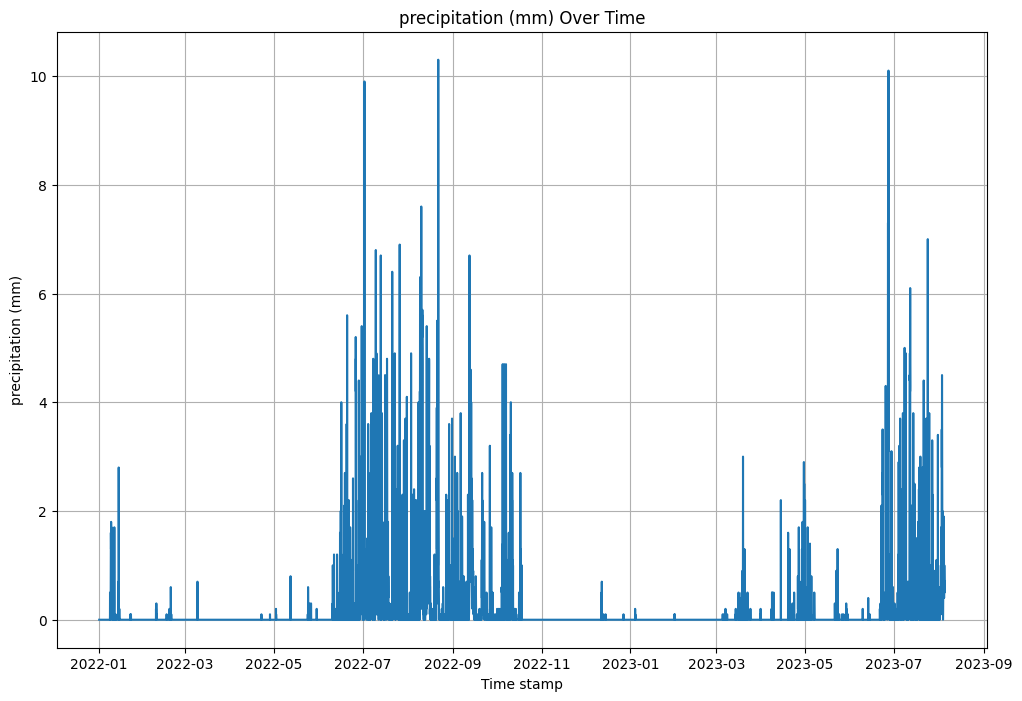

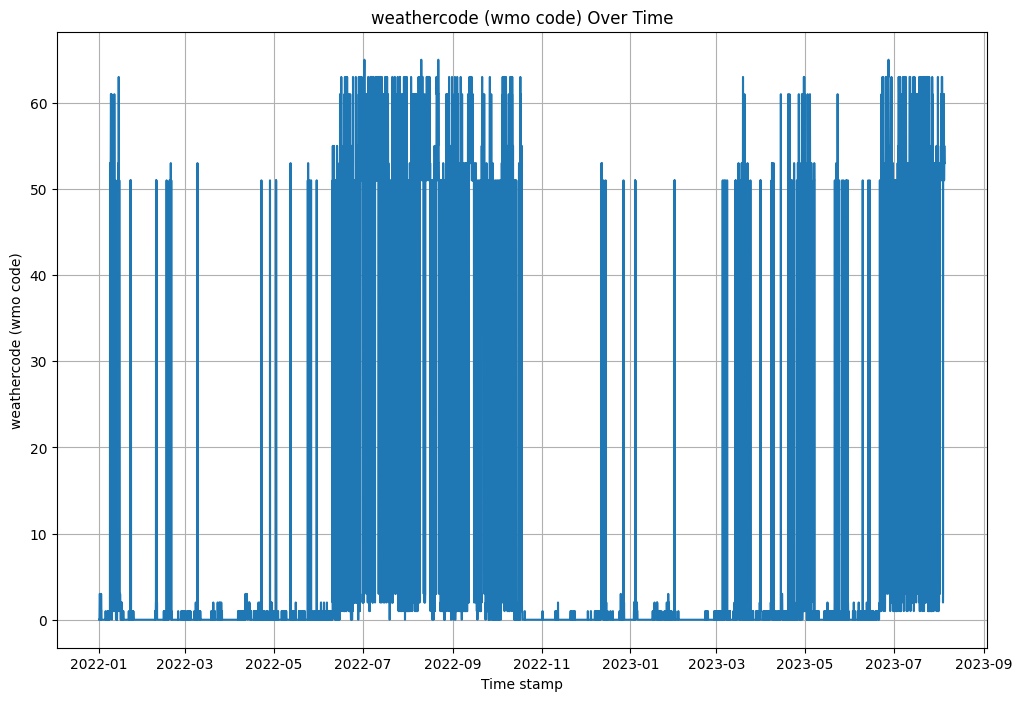

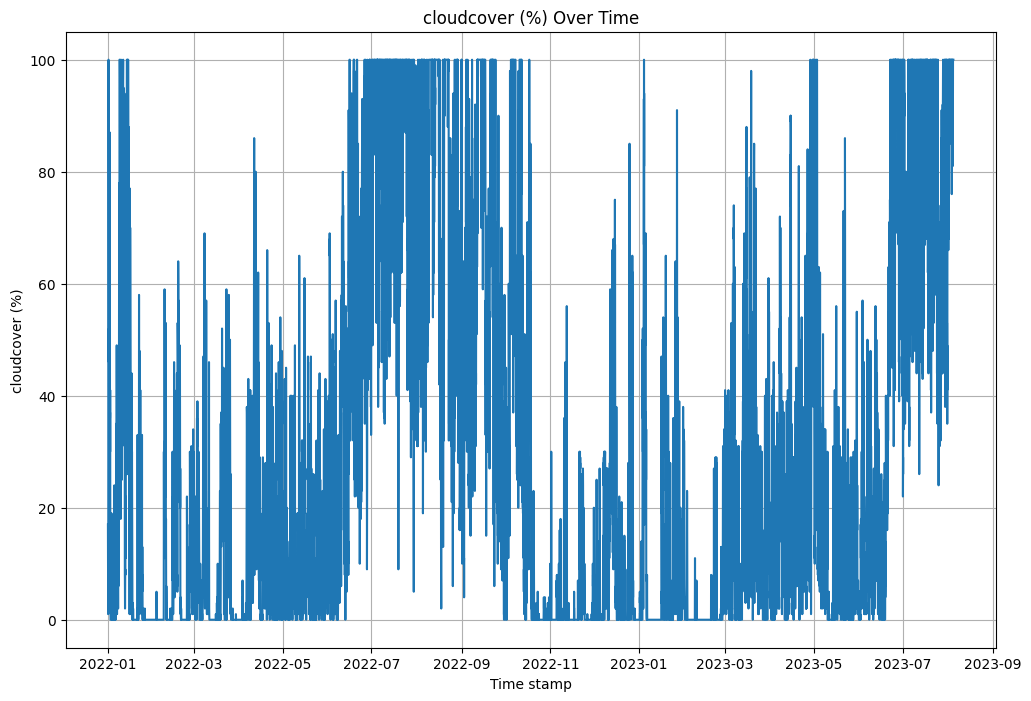

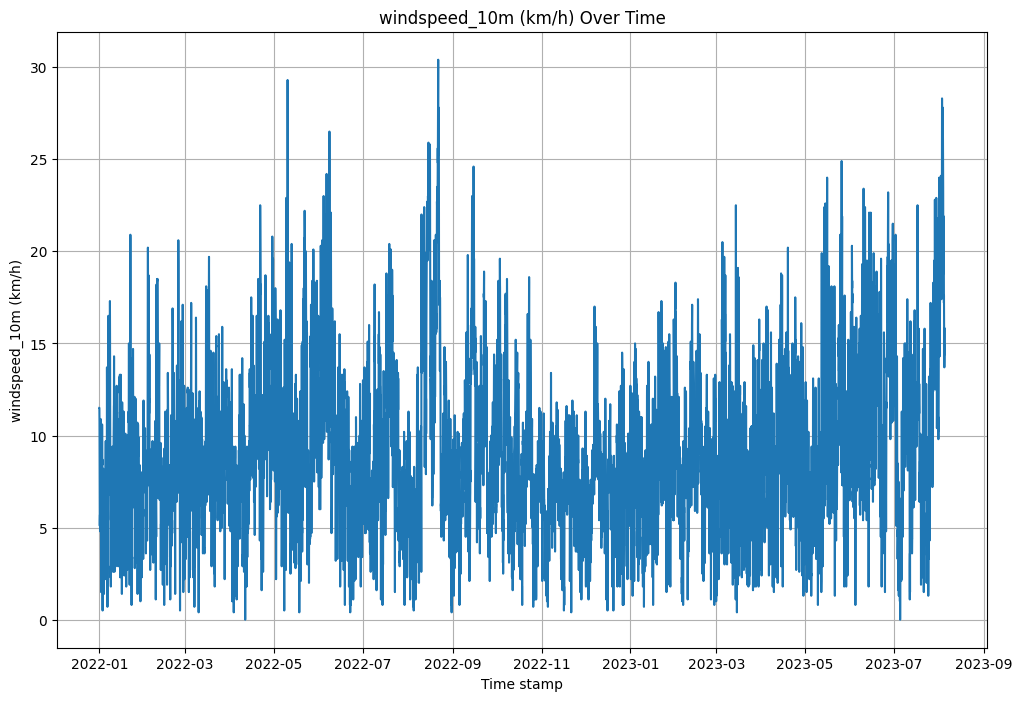

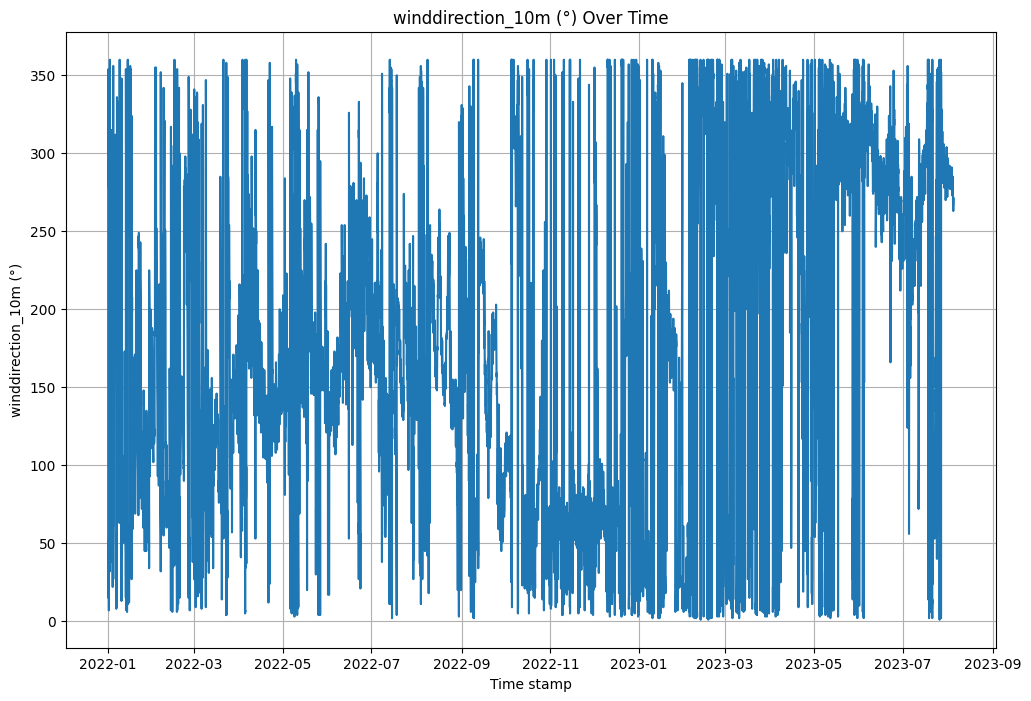

In [91]:

# Plot each feature against the timestamp
for column in columns_to_check:
    plt.figure(figsize=(12, 8))
    plt.plot(df['time'], df[column])
    plt.xlabel('Time stamp')
    plt.ylabel(column)
    plt.title(f'{column} Over Time')
    plt.grid(True)
    plt.show()

In [92]:
df.corr()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),Month
time,1.000000,0.062703,0.091187,0.043754,0.091068,0.103996,0.102449,0.339699,0.202267
temperature_2m (°C),0.062703,1.000000,-0.567215,-0.028329,-0.011045,0.028747,0.203962,0.303807,-0.019669
relativehumidity_2m (%),0.091187,-0.567215,1.000000,0.330224,0.540606,0.627308,-0.034855,-0.049951,0.365804
precipitation (mm),0.043754,-0.028329,0.330224,1.000000,0.601876,0.448801,0.127580,0.078817,0.134473
weathercode (wmo code),0.091068,-0.011045,0.540606,0.601876,1.000000,0.734322,0.136460,0.142435,0.235899
cloudcover (%),0.103996,0.028747,0.627308,0.448801,0.734322,1.000000,0.180231,0.177627,0.251094
windspeed_10m (km/h),0.102449,0.203962,-0.034855,0.127580,0.136460,0.180231,1.000000,0.114623,0.013720
winddirection_10m (°),0.339699,0.303807,-0.049951,0.078817,0.142435,0.177627,0.114623,1.000000,-0.111910
Month,0.202267,-0.019669,0.365804,0.134473,0.235899,0.251094,0.013720,-0.111910,1.000000


<Axes: >

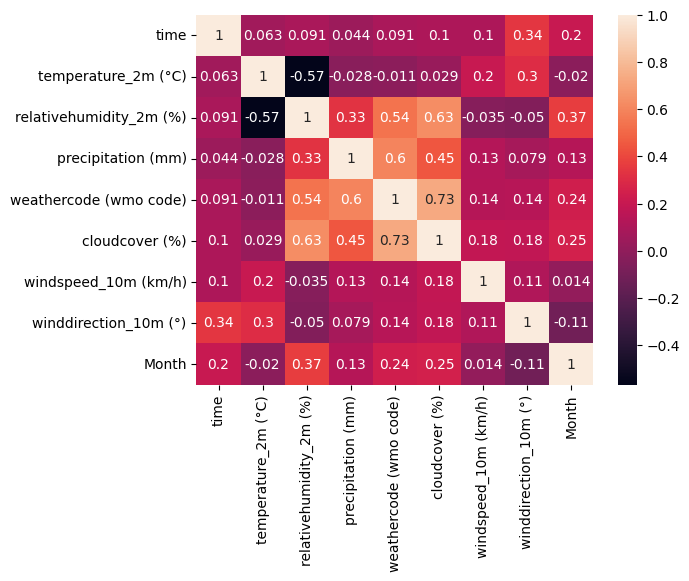

In [93]:
sns.heatmap(df.corr(),annot=True)

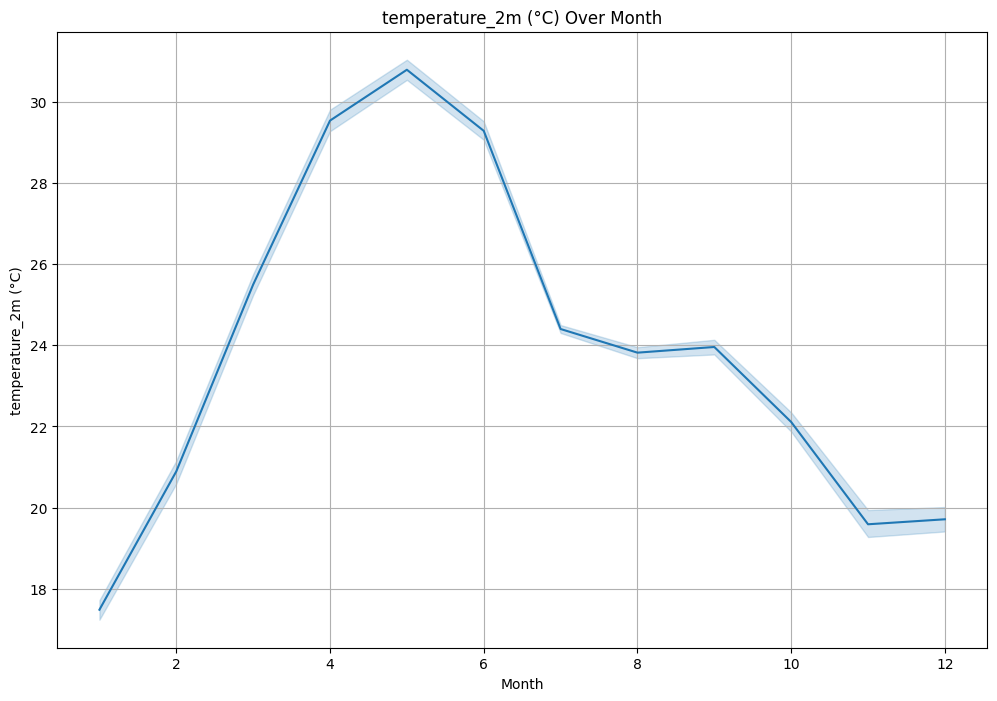

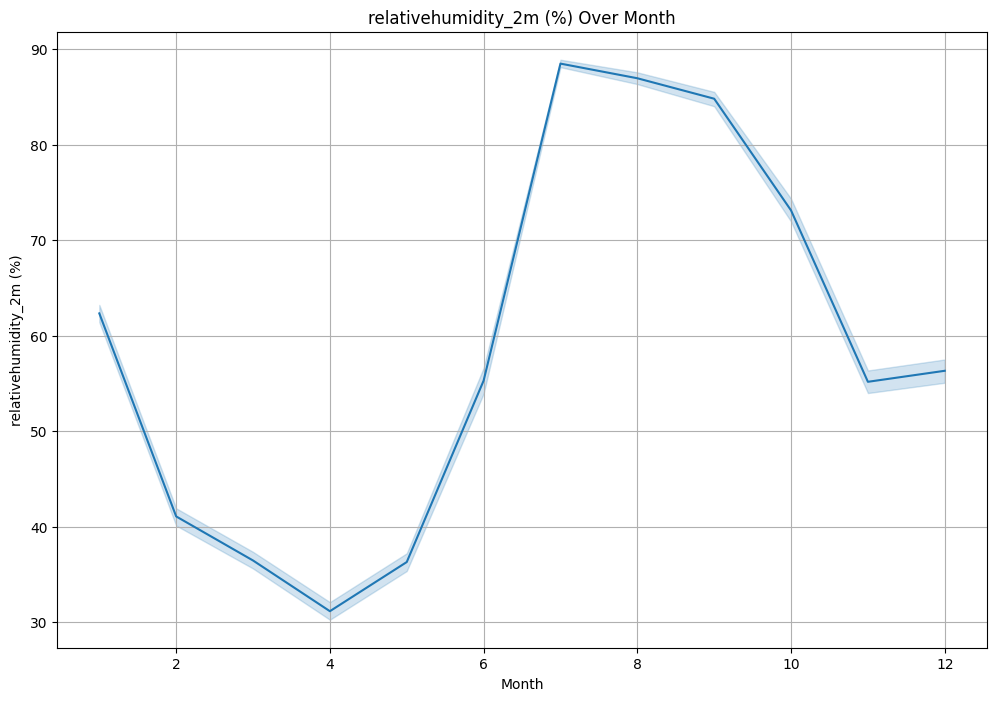

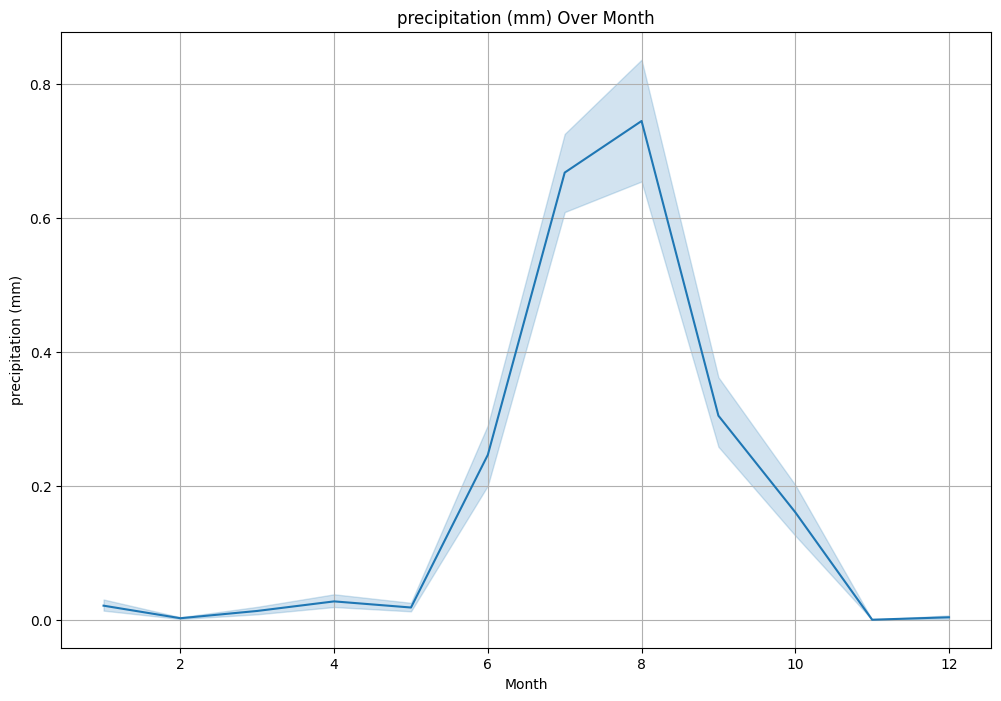

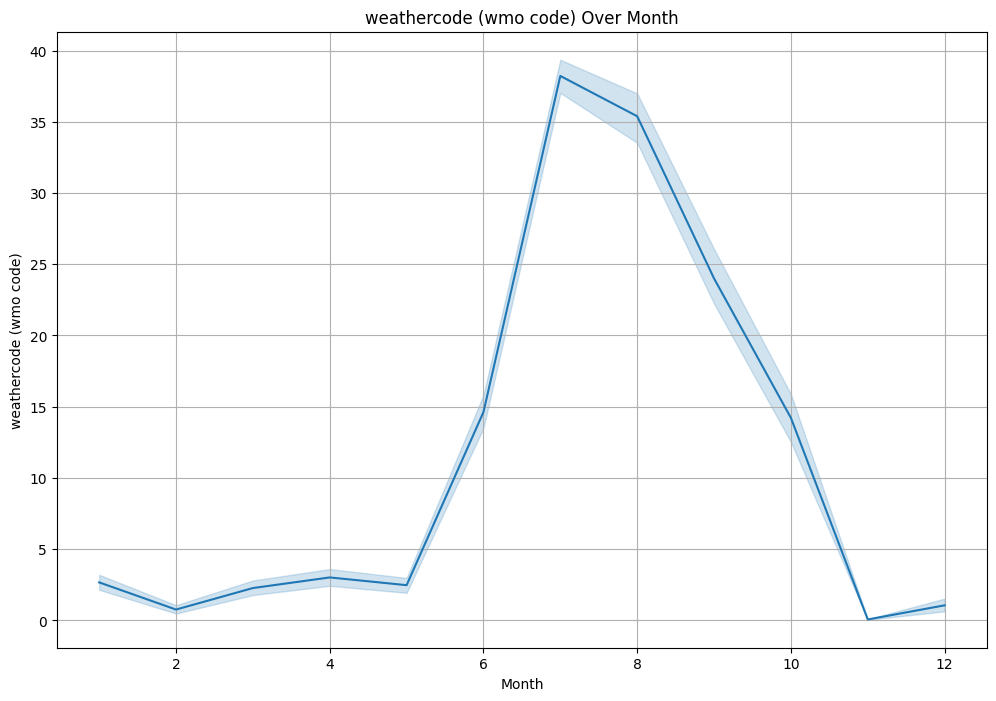

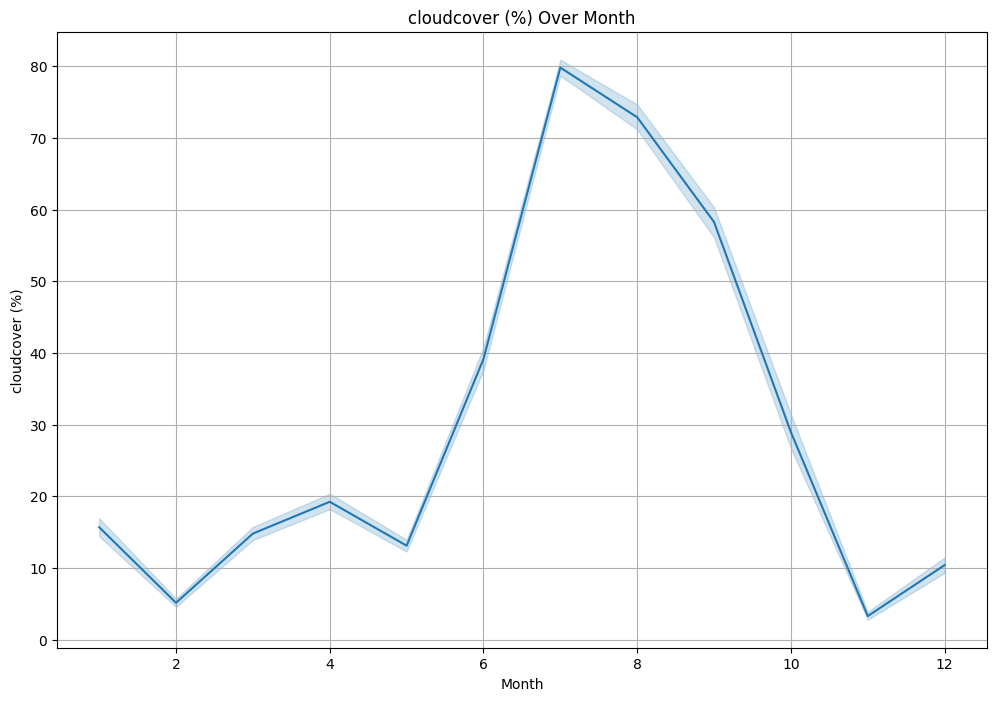

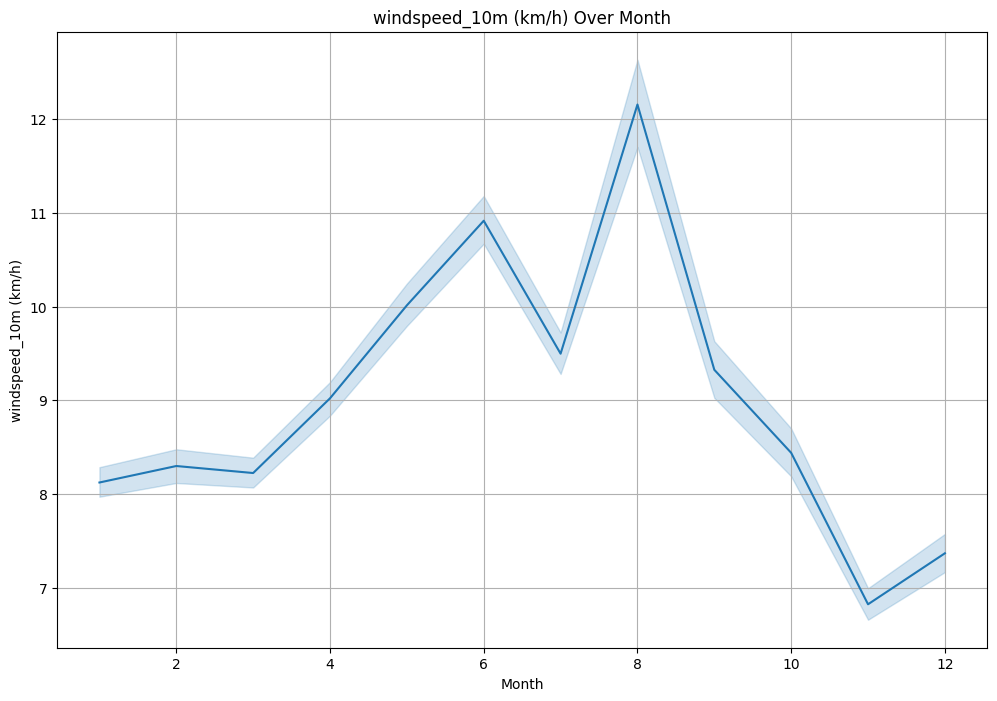

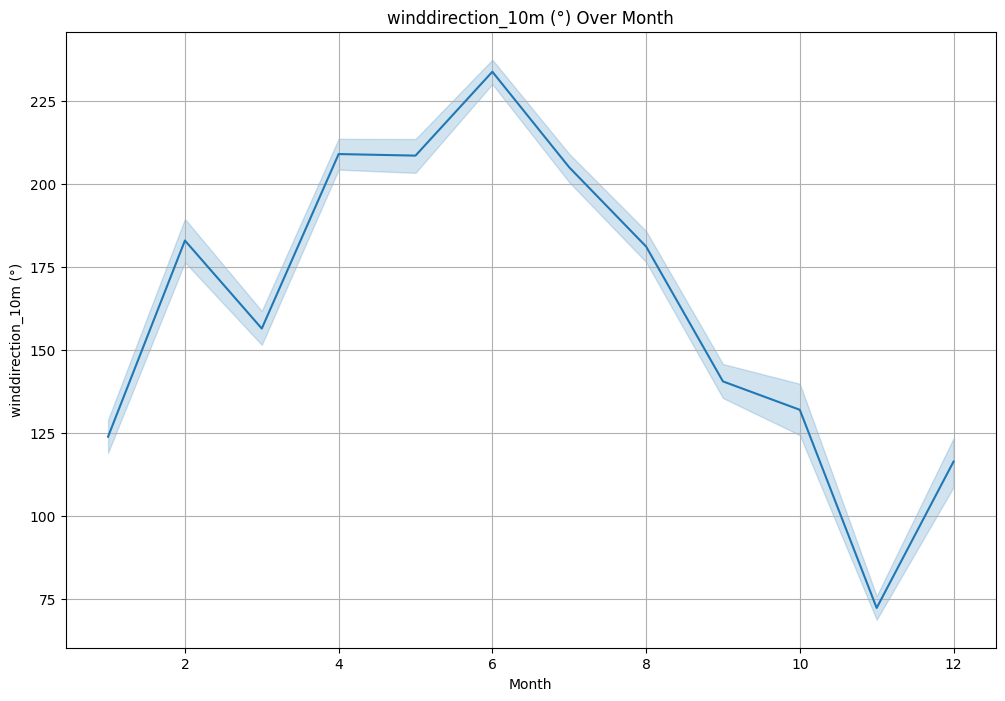

In [94]:
# Plot each feature against the timestamp
for column in columns_to_check:
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df,x='Month',y= column)
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'{column} Over Month')
    plt.grid(True)
    plt.show()

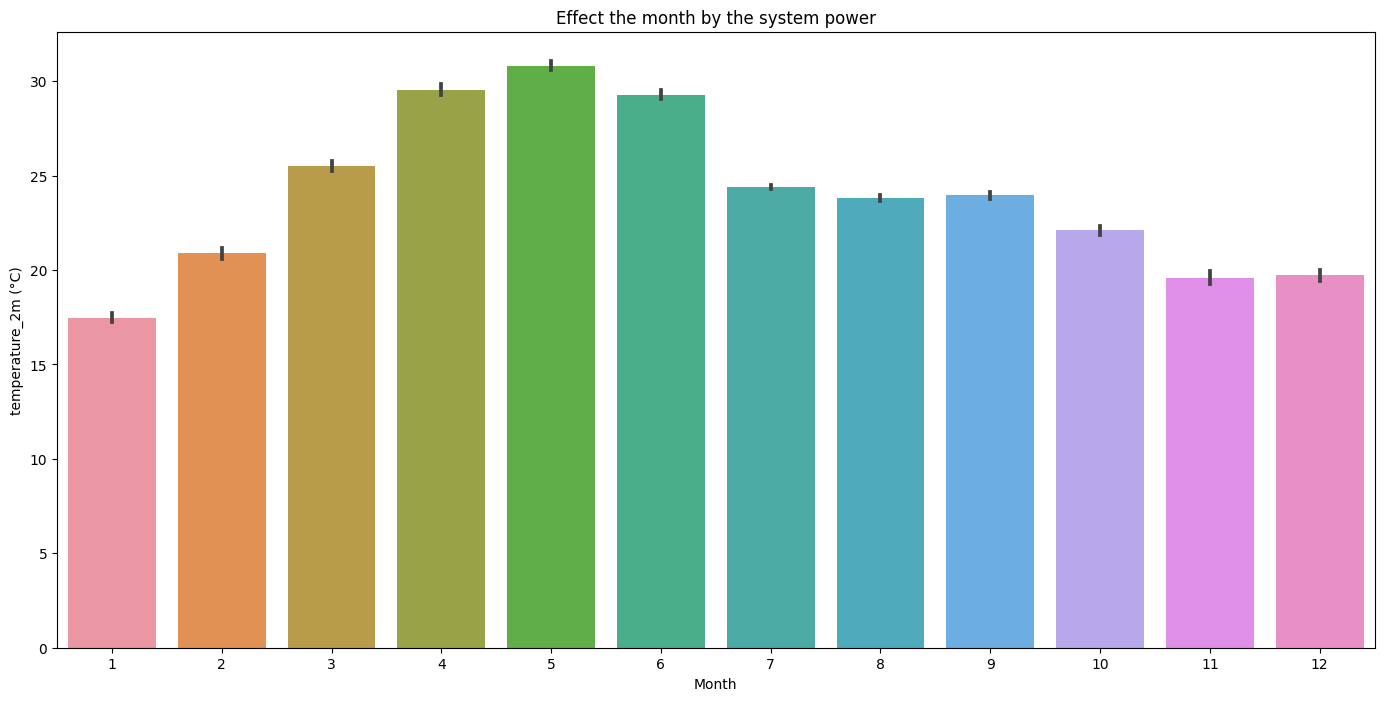

In [95]:
plt.figure(figsize=(17,8))
sns.barplot(data=df,x="Month",y="temperature_2m (°C)",)
plt.title("Effect the month by the system power")
plt.show()

In [96]:
# Set 'time' column as the index
df.set_index('time', inplace=True)

In [97]:
df.head()

,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),Month
time,,,,,,,,
2022-01-01 00:00:00,11.8,82.0,0.0,0.0,17.0,11.5,51.0,1
2022-01-01 01:00:00,11.6,83.0,0.0,0.0,13.0,11.5,49.0,1
2022-01-01 02:00:00,11.6,84.0,0.0,0.0,7.0,11.2,50.0,1
2022-01-01 03:00:00,14.2,76.0,0.0,0.0,2.0,10.7,45.0,1
2022-01-01 04:00:00,17.1,66.0,0.0,0.0,1.0,9.6,34.0,1


In [ ]:
np.mean(df['temperature_2m (°C)'])

24.481561962134254

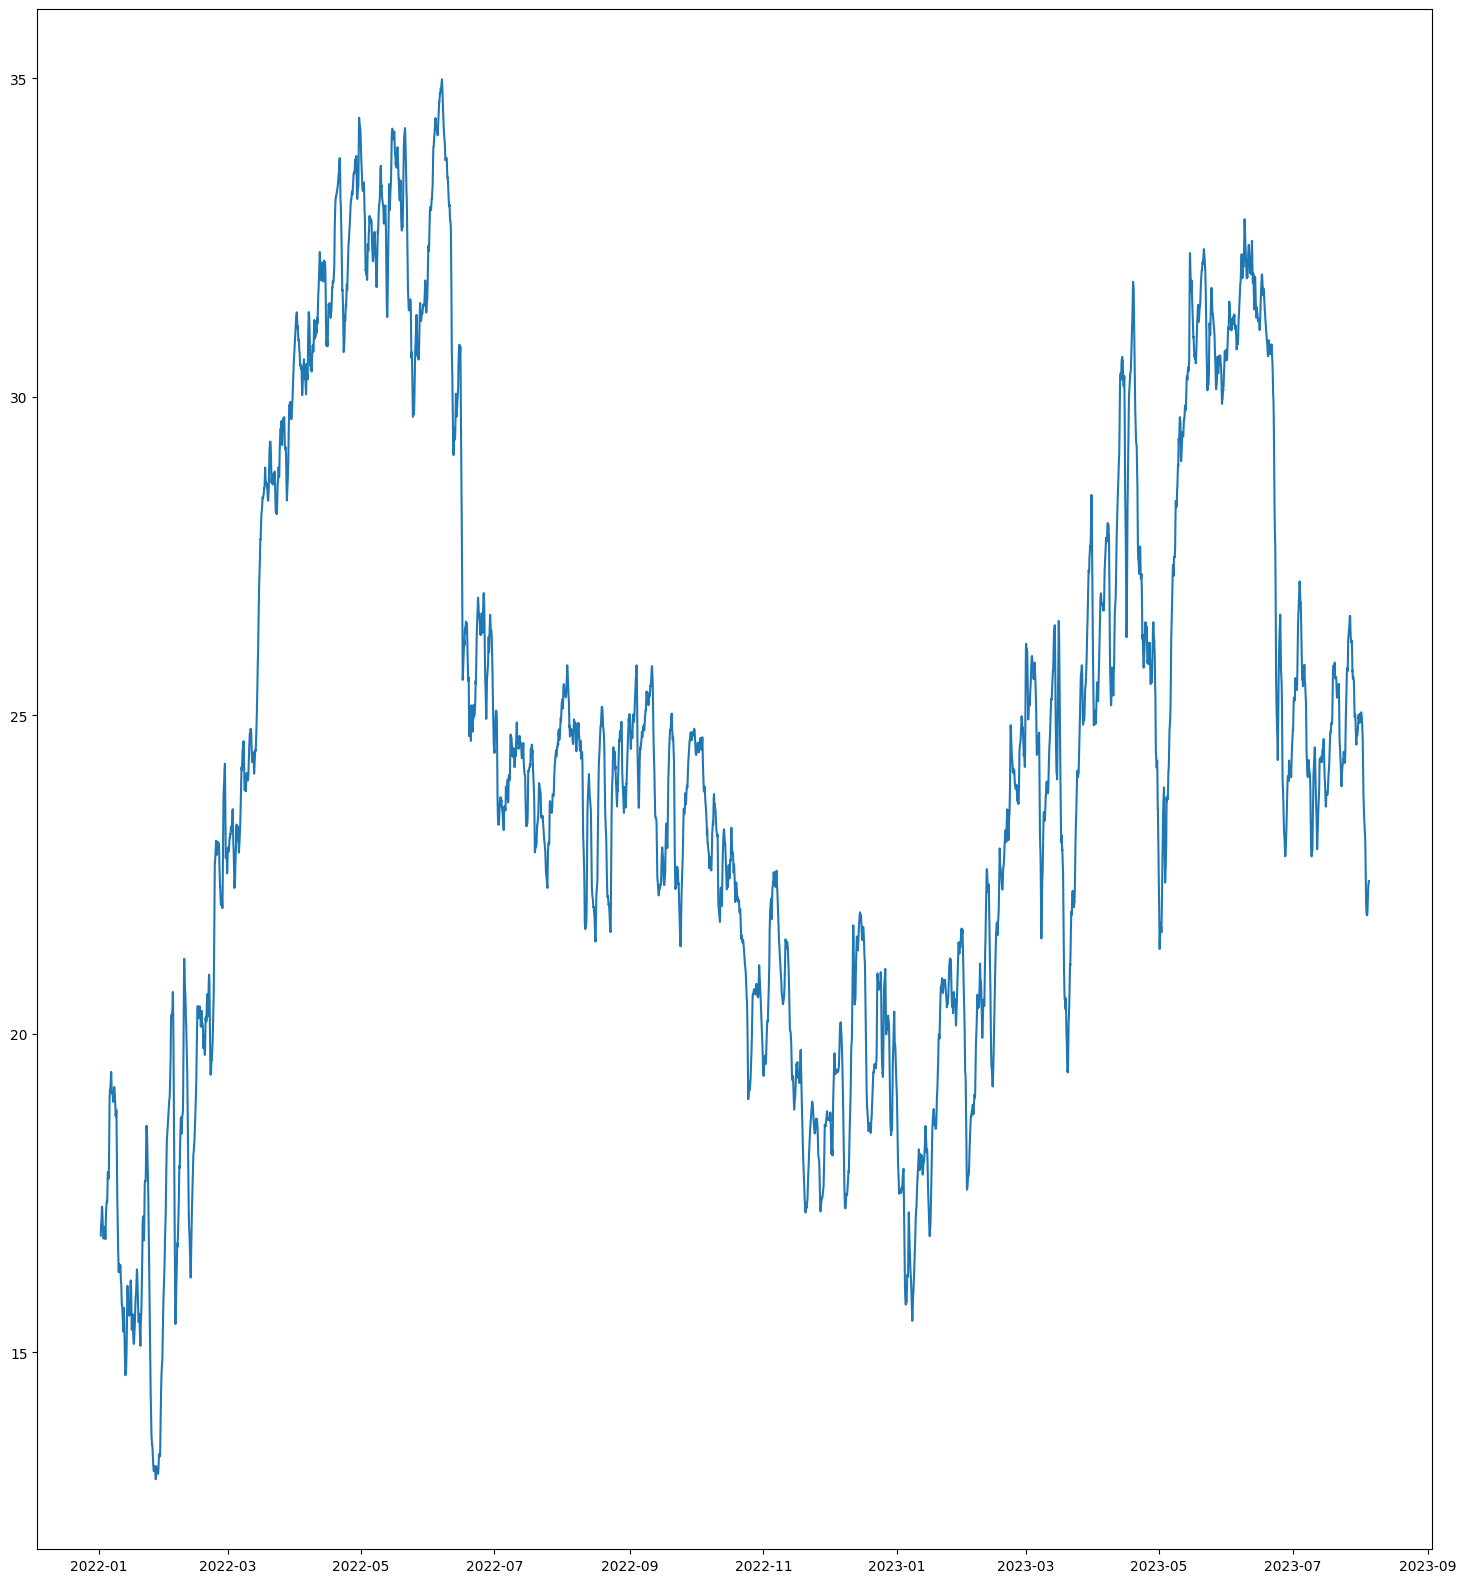

In [ ]:
plt.figure(figsize=(18,20))
plt.plot(df['temperature_2m (°C)'].rolling(24).mean())

In [ ]:
# Resample hourly data to daily frequency and calculate daily means
data = df.resample('D').mean()

In [ ]:
data.head()

,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),Month
time,,,,,,,,
2022-01-01,16.833333,70.875000,0.0,1.333333,43.041667,8.462500,122.541667,1.0
2022-01-02,16.958333,69.625000,0.0,0.500000,19.250000,6.929167,103.875000,1.0
2022-01-03,16.912500,65.333333,0.0,0.000000,3.750000,6.091667,104.166667,1.0
2022-01-04,17.433333,65.500000,0.0,0.000000,0.625000,4.441667,128.416667,1.0
2022-01-05,18.904167,62.041667,0.0,0.041667,3.666667,6.808333,249.666667,1.0


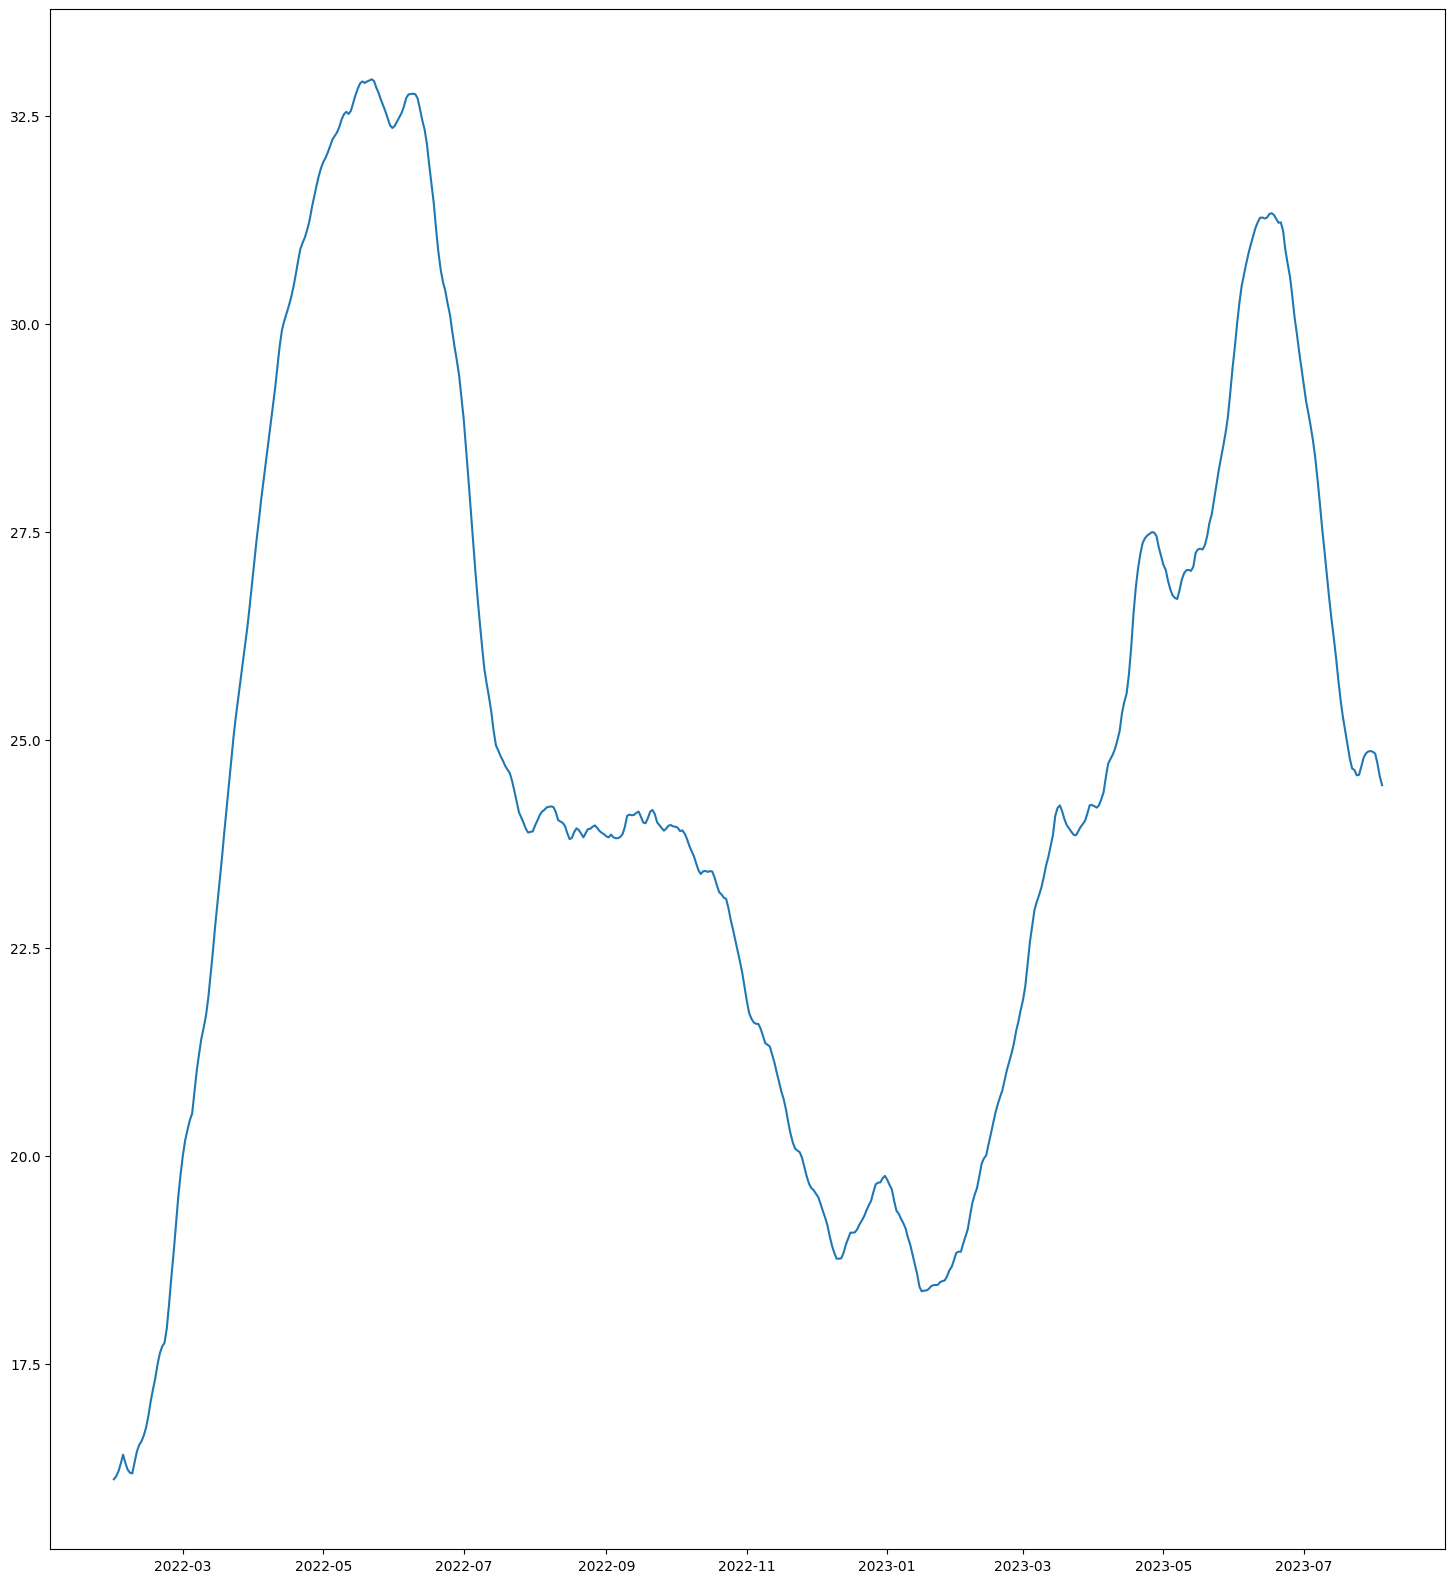

In [ ]:
plt.figure(figsize=(18,20))
plt.plot(data['temperature_2m (°C)'].rolling(30).mean())

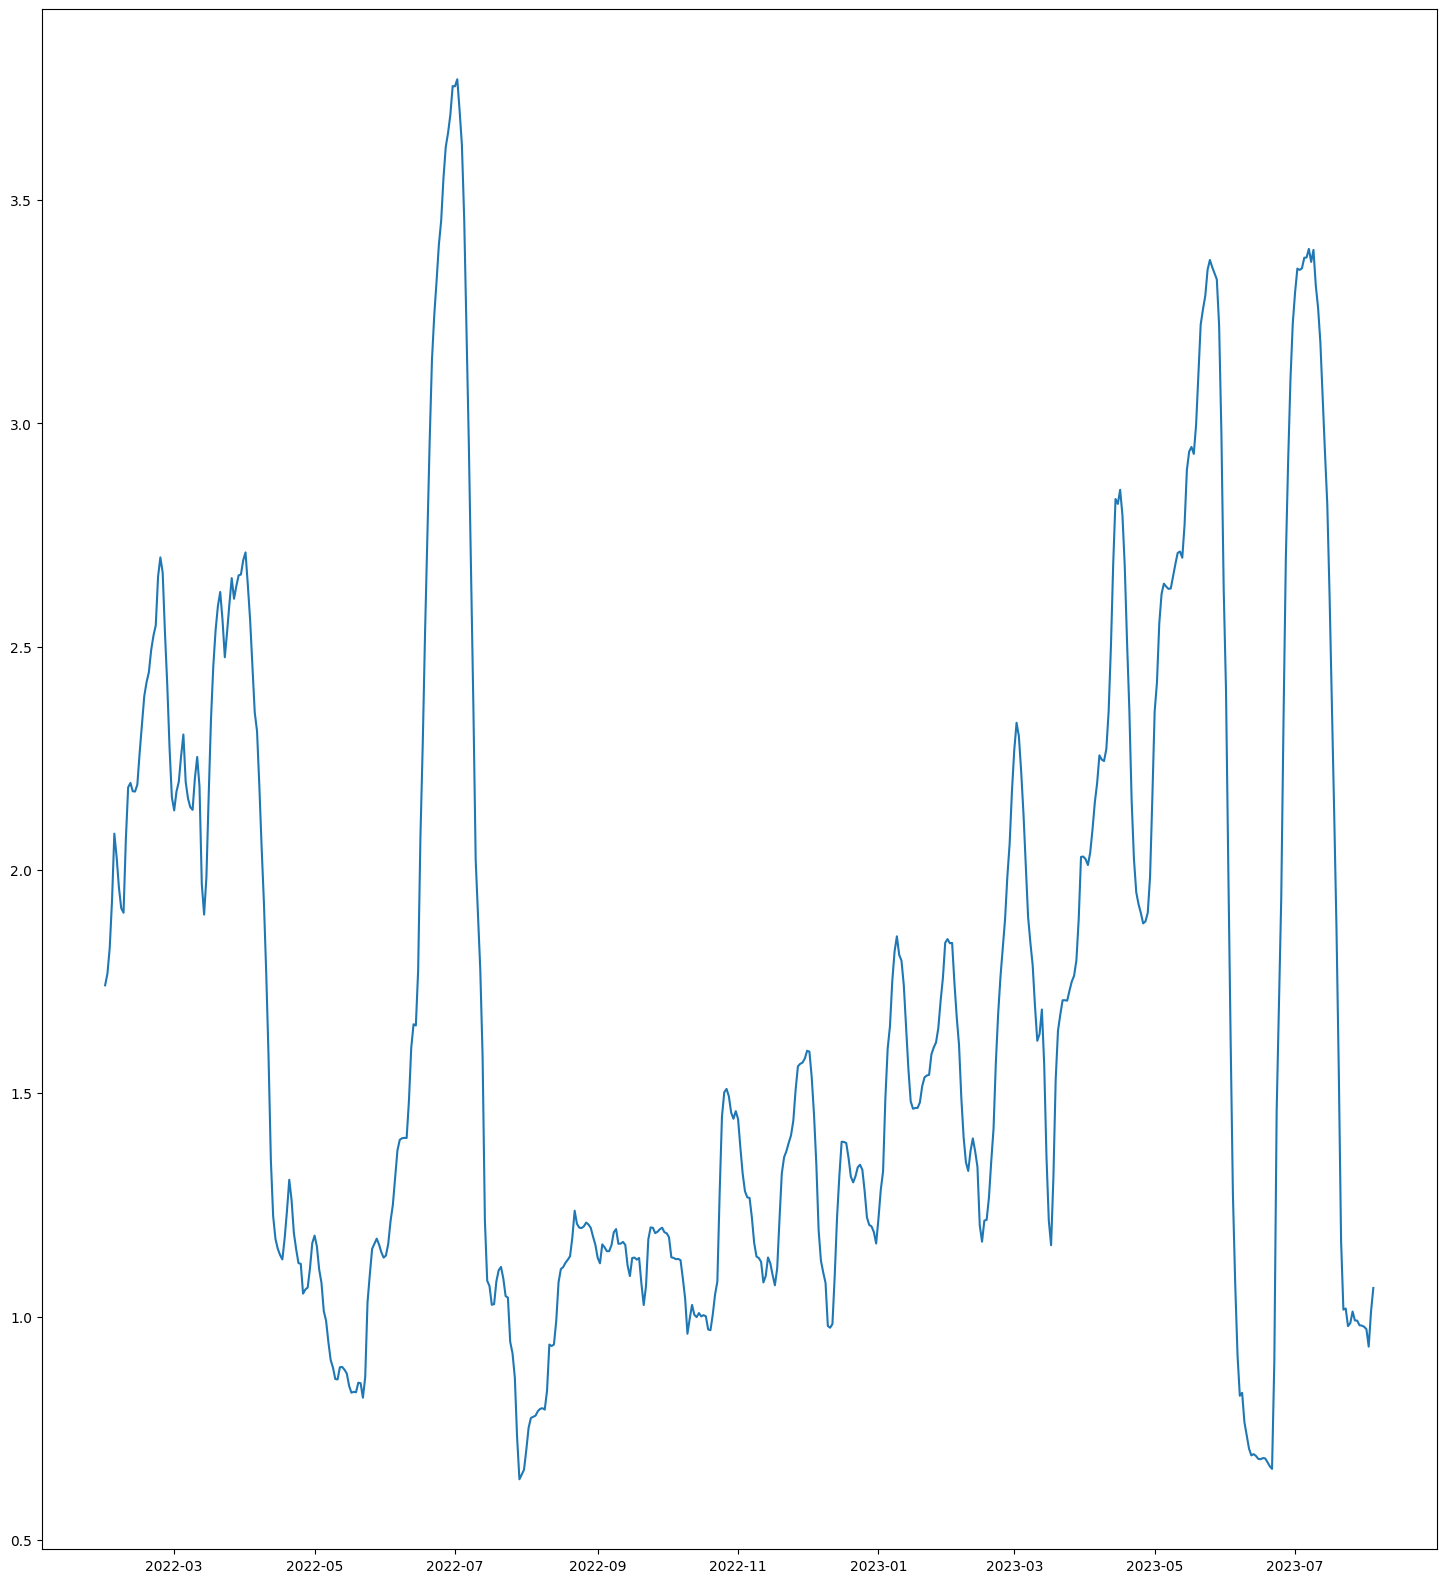

In [ ]:
plt.figure(figsize=(18,20))
plt.plot(data['temperature_2m (°C)'].rolling(30).std())

In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

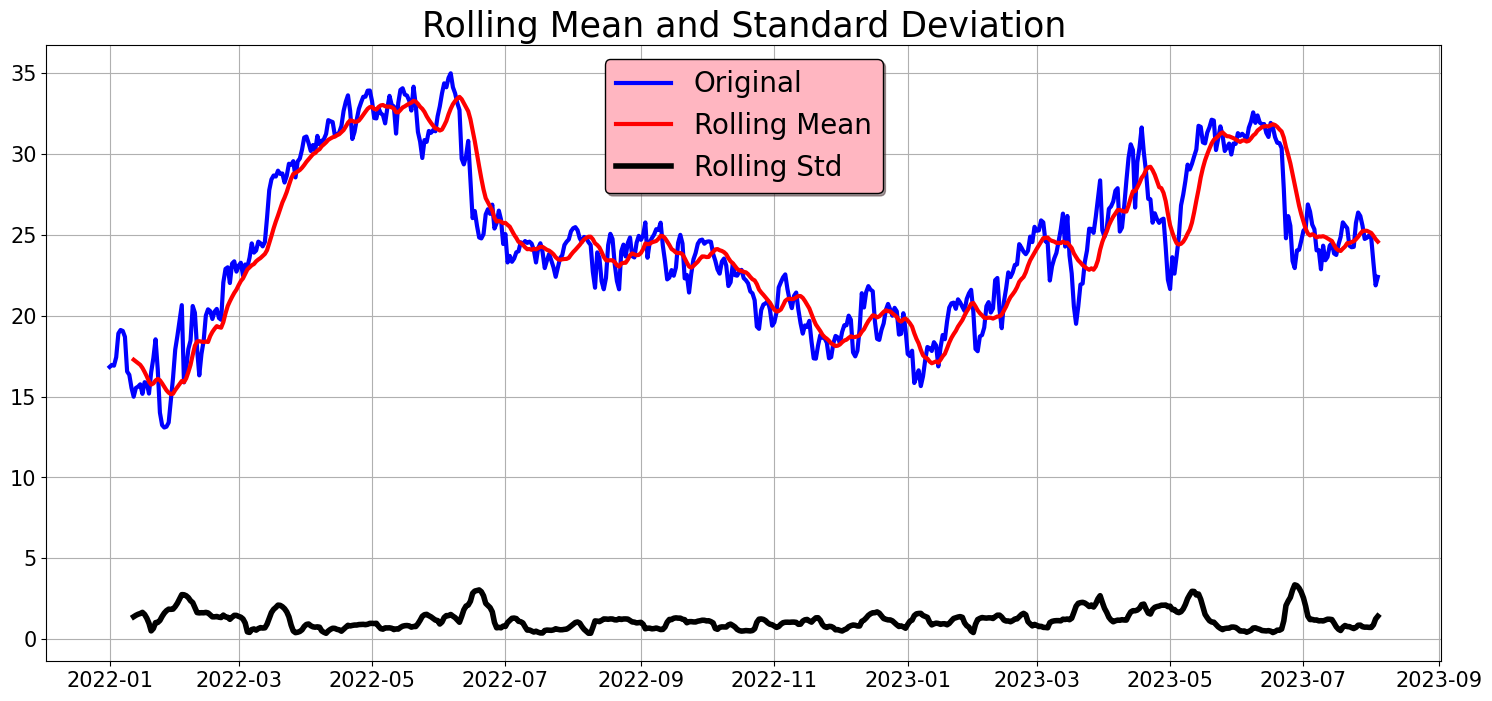

Results of dickey fuller test
Test Statistics                 -2.355151
p-value                          0.154797
No. of lags used                 3.000000
Number of observations used    577.000000
critical value (1%)             -3.441734
critical value (5%)             -2.866562
critical value (10%)            -2.569445
dtype: float64


In [ ]:
test_stationarity(data['temperature_2m (°C)'])

In [ ]:
# pvalue > 0.05 so we accept null hypothesis , so the data is non stationary. to make stationary we need to apply differencing

In [ ]:
df_temp=data[['temperature_2m (°C)']]


In [ ]:
df_temp_diff1=df_temp.diff()

In [ ]:
df_temp_diff1.isnull().sum()

temperature_2m (°C)    1
dtype: int64

In [ ]:
df_temp_diff1.dropna(inplace=True)

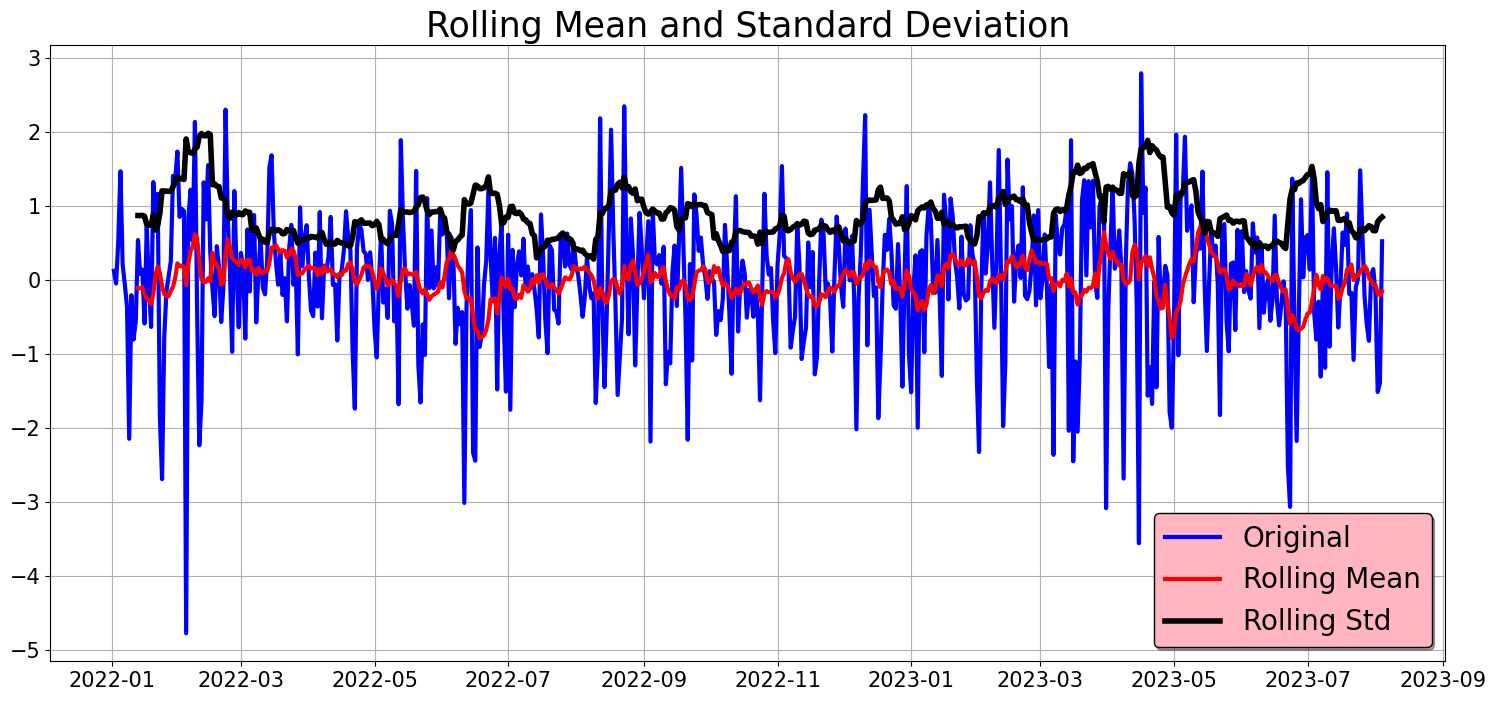

Results of dickey fuller test
Test Statistics               -1.581179e+01
p-value                        1.044610e-28
No. of lags used               2.000000e+00
Number of observations used    5.770000e+02
critical value (1%)           -3.441734e+00
critical value (5%)           -2.866562e+00
critical value (10%)          -2.569445e+00
dtype: float64


In [ ]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(df_temp_diff1)

In [ ]:
df_temp.head()

,temperature_2m (°C)
time,
2022-01-01,16.833333
2022-01-02,16.958333
2022-01-03,16.912500
2022-01-04,17.433333
2022-01-05,18.904167


In [ ]:
df_temp.shape

(581, 1)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result=seasonal_decompose(df_temp,period=30)

<Figure size 2000x1000 with 0 Axes>

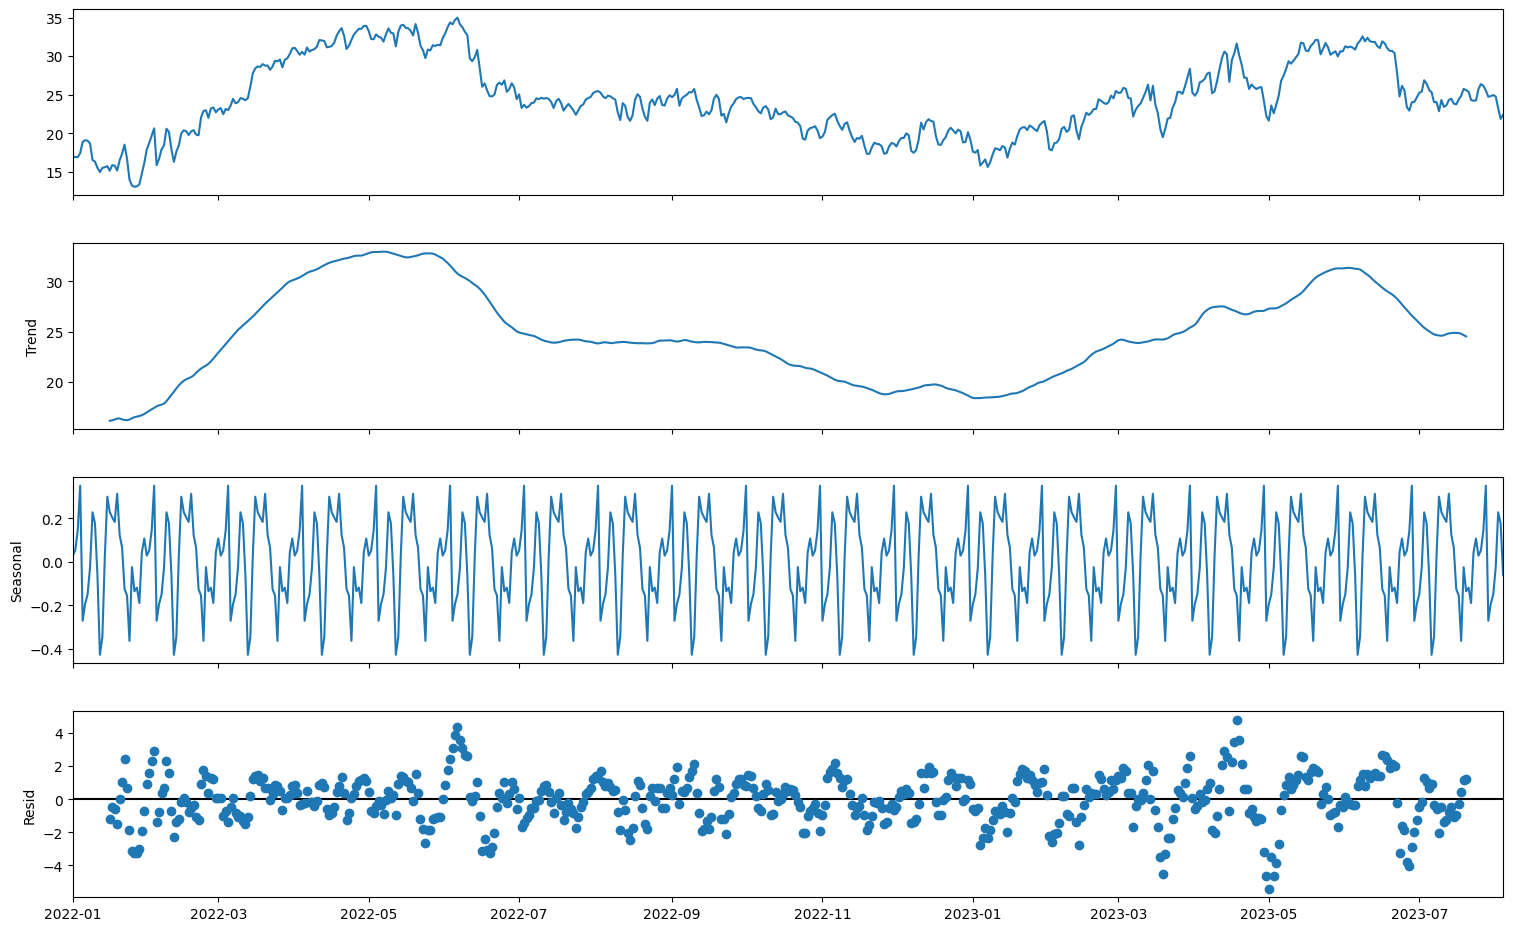

In [ ]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [ ]:
result1=seasonal_decompose(df_temp_diff1,period=30)

<Figure size 2000x1000 with 0 Axes>

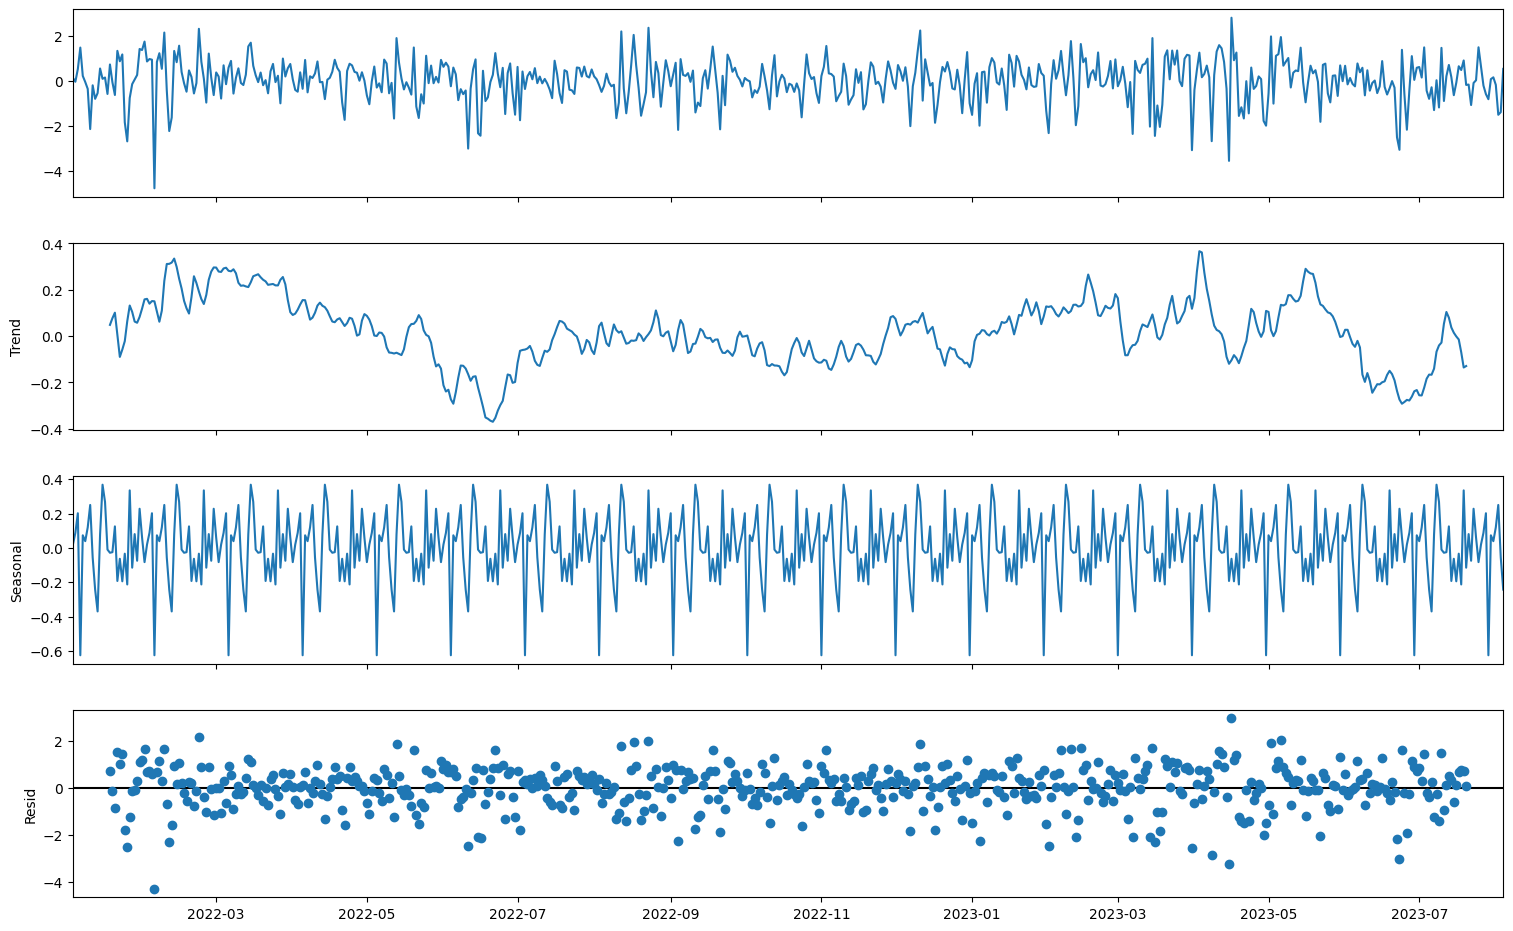

In [ ]:
fig=plt.figure(figsize=(20,10))
fig=result1.plot()
fig.set_size_inches(17,10)

In [ ]:
df_temp.shape

(581, 1)

In [ ]:
# Assuming you have a DataFrame named df with a datetime index
total_data_points = len(df_temp)
train_ratio = 0.8  # Specify the proportion for training data

split_index = int(total_data_points * train_ratio)
train_data = df_temp[:split_index]
test_data = df_temp[split_index:]

In [ ]:
train_data.shape

(464, 1)

In [ ]:
test_data.shape

(117, 1)

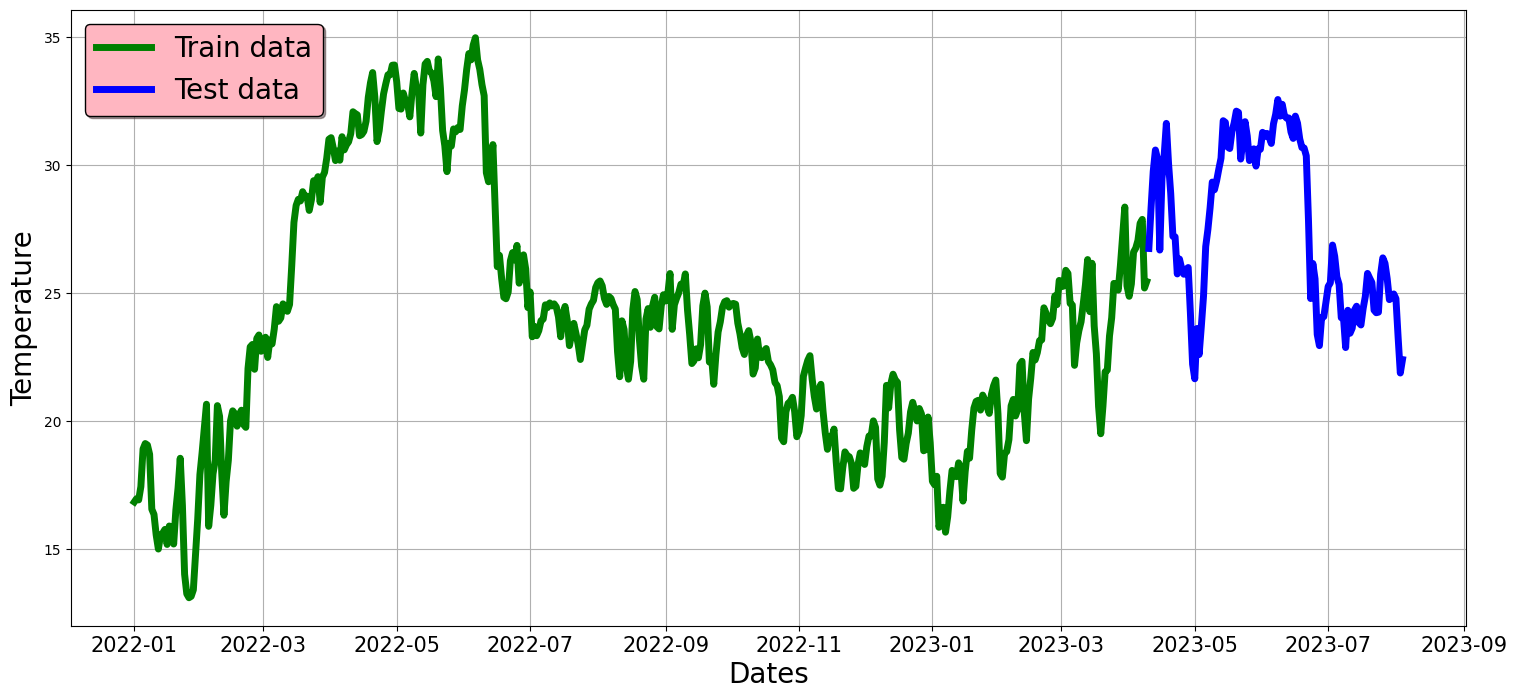

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [ ]:
# ACF & PACF PLOT

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

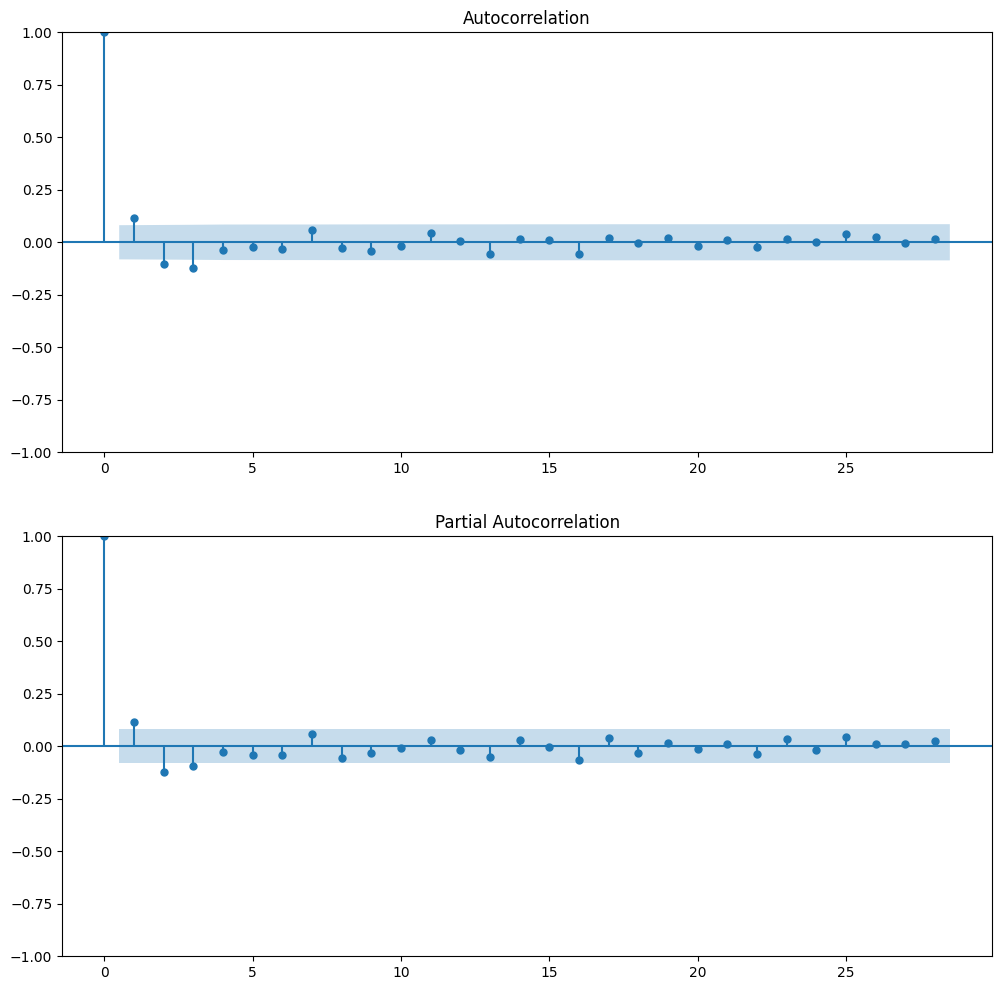

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(df_temp_diff1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_temp_diff1, ax=ax2)

In [ ]:
# consider p=2,q=2 and d=1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Create the ARIMA model
model = ARIMA(train_data, order=(0, 1, 0))  # Using the original training data, not differenced
model_fit = model.fit()

# Summary of the ARIMA model
print(model_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     temperature_2m (°C)   No. Observations:                  464
Model:                  ARIMA(0, 1, 0)   Log Likelihood                -614.025
Date:                 Mon, 14 Aug 2023   AIC                           1230.050
Time:                         12:44:34   BIC                           1234.188
Sample:                     01-01-2022   HQIC                          1231.679
                          - 04-09-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8307      0.038     21.754      0.000       0.756       0.906
Ljung-Box (L1) (Q):                   6.31   Jarque-Bera (JB):               140.54
Prob(Q):                              0

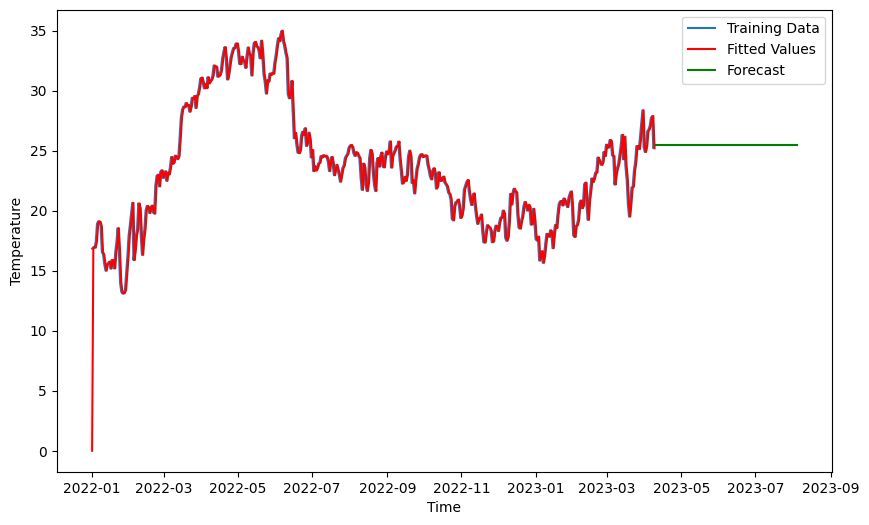

In [ ]:
# Forecasting future values
forecast_steps = len(test_data)  # Forecast for the same length as the test data
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the original training data, fitted values, and forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(test_data.index, forecast, color='green', label='Forecast')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()




In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


#NEW CODE

In [ ]:
df_temp.head()

,temperature_2m (°C)
time,
2022-01-01,16.833333
2022-01-02,16.958333
2022-01-03,16.912500
2022-01-04,17.433333
2022-01-05,18.904167


In [ ]:
# Assuming you have a DataFrame named df with a datetime index
total_data_points = len(df_temp)
train_ratio = 0.8  # Specify the proportion for training data

split_index = int(total_data_points * train_ratio)
train_data1 = df_temp[:split_index]
test_data1 = df_temp[split_index:]

In [ ]:
df_temp_diff1.head()

,temperature_2m (°C)
time,
2022-01-02,0.125000
2022-01-03,-0.045833
2022-01-04,0.520833
2022-01-05,1.470833
2022-01-06,0.212500


predicted=25.755688, expected=26.745833
predicted=27.050877, expected=28.325000
predicted=28.420255, expected=29.762500
predicted=29.636576, expected=30.595833
predicted=30.283056, expected=30.241667
predicted=29.787274, expected=26.683333
predicted=25.990341, expected=29.479167
predicted=30.126814, expected=30.387500
predicted=30.306415, expected=31.637500
predicted=31.507299, expected=30.075000
predicted=29.555261, expected=28.895833
predicted=28.773356, expected=27.220833
predicted=27.228188, expected=27.200000
predicted=27.583239, expected=25.750000
predicted=25.535413, expected=26.333333
predicted=26.796498, expected=25.970833


c:\Users\DELL\OneDrive\Documents\Vino_WIP\Weather_Prediction\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=26.132695, expected=25.737500
predicted=25.906147, expected=25.929167
predicted=26.117796, expected=26.000000
predicted=26.098330, expected=24.216667
predicted=24.089323, expected=22.220833
predicted=21.986790, expected=21.650000
predicted=22.077057, expected=23.616667
predicted=23.853989, expected=22.600000
predicted=22.480105, expected=23.704167
predicted=23.962188, expected=24.883333
predicted=24.945655, expected=26.820833
predicted=26.821568, expected=27.487500
predicted=27.144894, expected=28.333333
predicted=28.045593, expected=29.341667
predicted=29.073901, expected=29.041667
predicted=28.599858, expected=29.395833
predicted=29.183783, expected=29.850000
predicted=29.681255, expected=30.275000
predicted=30.114657, expected=31.741667
predicted=31.725599, expected=31.675000
predicted=31.352793, expected=30.716667
predicted=30.486356, expected=30.654167
predicted=30.626250, expected=31.320833
predicted=31.396521, expected=31.650000
predicted=31.601022, expected=32.116667


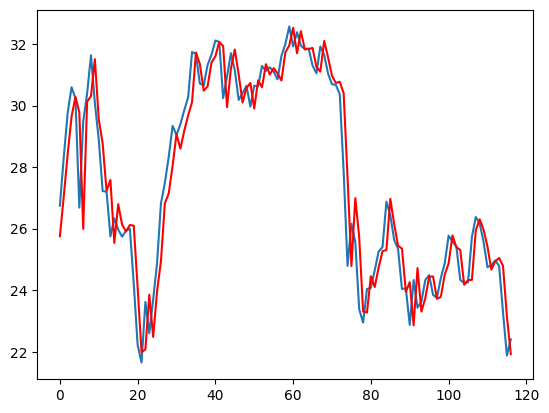

In [ ]:
from math import sqrt
# Convert your data to numpy arrays
train_data2 = train_data1.values
test_data2 = test_data1.values

history = [x for x in train_data2]
predictions = list()
# walk-forward validation
for t in range(len(test_data2)):
 model = ARIMA(history, order=(2,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test_data2[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data2, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test_data2)
plt.plot(predictions, color='red')
plt.show()

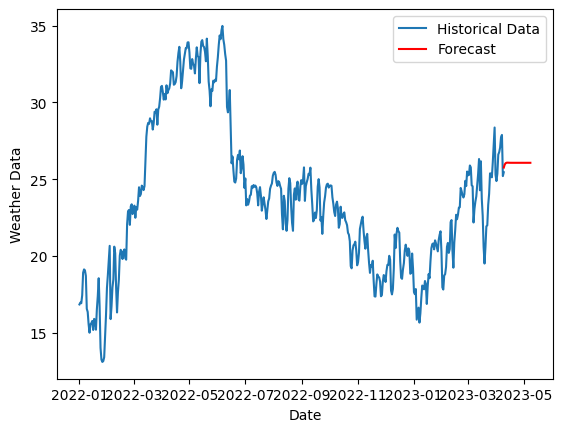

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming train_data1 and test_data1 are already defined or loaded as DataFrames

# Convert your data to numpy arrays
train_data2 = train_data1.values

# Fit the ARIMA model on the entire training dataset
model = ARIMA(train_data2, order=(2, 1, 1))
model_fit = model.fit()

# Define the number of future time steps you want to forecast
forecast_steps = 30  # Adjust as needed

# Forecast future values
predictions = model_fit.forecast(steps=forecast_steps)

# Plot forecasts
plt.plot(train_data1.index, train_data2, label='Historical Data')
plt.plot(pd.date_range(start=train_data1.index[-1], periods=forecast_steps, freq=train_data1.index.freq), predictions, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Weather Data')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming train_data1 and test_data1 are already defined or loaded as DataFrames

# Convert your data to numpy arrays
train_data2 = train_data1.values

# Fit the ARIMA model on the entire training dataset
model = ARIMA(train_data2, order=(5, 1, 0))
model_fit = model.fit()

# Define the number of future time steps you want to forecast
forecast_steps =60  # Adjust as needed

# Forecast future values
predictions = model_fit.forecast(steps=forecast_steps)

# Generate future dates starting from the last date in the training data
last_date = test_data1.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps, freq=test_data1.index.freq)

# Create a DataFrame to store the forecasted values and dates
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Value': predictions})

# Print the forecasted DataFrame
print(forecast_df)

         Date  Forecasted_Value
0  2023-08-04         25.776389
1  2023-08-05         25.990771
2  2023-08-06         26.132361
3  2023-08-07         26.166851
4  2023-08-08         26.098737
5  2023-08-09         26.046250
6  2023-08-10         26.028880
7  2023-08-11         26.032989
8  2023-08-12         26.044341
9  2023-08-13         26.052840
10 2023-08-14         26.054953
11 2023-08-15         26.053287
12 2023-08-16         26.051063
13 2023-08-17         26.049837
14 2023-08-18         26.049707
15 2023-08-19         26.050112
16 2023-08-20         26.050507
17 2023-08-21         26.050675
18 2023-08-22         26.050654
19 2023-08-23         26.050568
20 2023-08-24         26.050503
21 2023-08-25         26.050483
22 2023-08-26         26.050494
23 2023-08-27         26.050510
24 2023-08-28         26.050520
25 2023-08-29         26.050522
26 2023-08-30         26.050519
27 2023-08-31         26.050516
28 2023-09-01         26.050515
29 2023-09-02         26.050515
30 2023-

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming train_data1 and test_data1 are already defined or loaded as DataFrames

# Convert your data to numpy arrays
train_data2 = train_data1.values

# Fit the ARIMA model on the entire training dataset
model = ARIMA(train_data2, order=(2, 1, 1))
model_fit = model.fit()

# List of target future dates for which you want to forecast
target_dates = ['2023-08-15', '2023-08-16', '2023-08-18','2023-08-19','2023-08-20']  # Add your desired dates

# Convert target dates to DateTime format
target_dates = pd.to_datetime(target_dates)

# Forecast future values for the target dates
predictions = model_fit.forecast(steps=len(target_dates))

# Create a DataFrame to store the forecasted values and dates
forecast_df = pd.DataFrame({'Date': target_dates, 'Forecasted_Value': predictions})

# Print the forecasted DataFrame
print(forecast_df)

        Date  Forecasted_Value
0 2023-08-15         25.755688
1 2023-08-16         25.949387
2 2023-08-18         26.039609
3 2023-08-19         26.070305
4 2023-08-20         26.075379


In [ ]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))



# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_temp.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=4.034
ARIMA(0, 0, 1) RMSE=2.462
ARIMA(0, 0, 2) RMSE=2.034
ARIMA(0, 1, 0) RMSE=1.036
ARIMA(1, 0, 0) RMSE=1.032
ARIMA(1, 0, 1) RMSE=1.030
ARIMA(2, 0, 0) RMSE=1.029


In [ ]:
df_temp.head()

NameError: name 'df_temp' is not defined